# Deciding when to Quit the Gambler’s Ruin Game with Unknown Probabilities

In the classical gambler's ruin setting, the player starts with an initial budget $b_0$ and, at each round, such budget can be increased by $1$
with probability $p$, or decreased by $1$ 
with probability $1 - p$.

The gambler is said to *win* the game if the budget reaches a given objective level $g$, and she/he is said to *lose* the game if the budget drops to zero (the gambler is ruined).
In this paper we modify the standard setting both by hiding $p$,
and by 
giving the player the possibility to stop the game at any time keeping earnings.

In a such *decisional gambling process*, the solution is estimating $p$ from the past observations and, at each round, make a decision based on such estimation.

Let a *decisional gambling process* be:

\begin{cases}
     b_0 \in \mathbb{N} \mid b_0 > 0 & \text{the gambler's initial budget}, \\
     a_0 \in \mathbb{N} \mid a_0 > 0 & \text{the adversary's initial budget},\\
     g \in \mathbb{N} \mid g = a_0 + b_0 & \text{the total fortune inside the game},\\
     p \in \mathbb{R} \mid 0 \leq p \leq 1 & \text{the probability of success},\\
     q \in \mathbb{R} \mid q = 1 - p & \text{the probability of fail}, \\
     \pi(b_t,g,k_t,t) \to \{\top, \bot\} & \text{the decision function}. 
\end{cases}

A *decisional gambling process* corresponds to a series of rewarded *Bernoulli trials*.
At each round $t$, the gambler can observe either a *success*, represented by $x_t=1$, which returns a constant reward $r_t=+1$, or a *fail*, denoted $x_t=0$, which returns a constant reward $r_t=-1$.

Each value $x_t$ corresponds to the \textit{realization} of a \textit{random variable} $X$ in time $t$. 
Each trial is independent and identically distributed, drawn from a stationary Bernoulli distribution:

$ 
x_t \sim \textbf{Bern}(p) =  
\begin{cases}
   1 & \text{with probability } p ,\\
   0 & \text{with probability } q = 1-p. %otherwise}
\end{cases}
$

The reward received in time $t$ is directly related to the result of the corresponding trial:

$r_t = 2 x_t - 1$

Let $\tau$ denote the time at which the game stops, i.e. the earlier round in which the budget reaches either $g$ or $0$, or when the gambler decides to leave the game:

$\tau = \min\limits_{t \in \mathbb{N}} \bigl[ (b_t = 0) \lor (b_t = g) \lor (d_t = \bot) \bigr]$

where $d_t$ represents the decision at time $t$, which can assume the following values:

$
d_t = \pi(b_t, g, k_t, t) = 
\begin{cases}
\bot  &  \text{if the gambler quits the game in time $t$,}\\
\top  &  \text{if the gambler keeps playing in time $t+1$.}
\end{cases}
$

The budget evolves with the received rewards:

$  \{ \forall h \in \mathbb{N} \mid 0 < h \leq \tau \} \ : \quad
  b_h = b_0 + \sum\limits^{h}_{t=1} {r_t}.
$

$
\forall t \in \mathbb{N} \ : \
  b_{t+1} = 
  \begin{cases}
    b_{t} & \text{ if } (b_{t}=0) \lor (b_{t}=g) \lor (d_{t}=\bot), \\
    b_{t} + r_{t+1} & \text{ otherwise, }
  \end{cases}
$

The number of successful trials $k_h$ counted until time $h$ corresponds to:

$  \{ \forall h \in \mathbb{N} \mid 0 < h \leq \tau \} \ : \quad
  k_h = \sum^{h}_{t=1} {x_t}.
$

The process must be, at every time-step $t$, in one of the following states:  

$
\{ \forall t \in \mathbb{N} \mid t \leq \tau \} \ : \quad
s_t = 
\begin{cases}
  \textit{win}   & \text{ if } \ b_t = g, \\
  \textit{lose}  & \text{ if } \ b_t = 0, \\
  \textit{stop}  & \text{ if } \ d_t = \bot, \\
  \textit{undefined}  & \text{ otherwise}. \\
\end{cases}
$

However, by analogy to the *gambler's ruin*, and because $g$ is finite, it can be demonstrated that a *decisional gambling process* 
is always finite in time (i.e. eventually either the gambler or the adversary must win, unless the gambler quits the game).
It means that $\tau$ is always finite, and there is no possibility for a game to remain undefined as time goes to infinity: 

$
\lim\limits_{t \to \infty} \mathbb{P}(s_t\!=\!\textit{undefined}) \ = \ \mathbb{P}(\tau \to \infty) \ = \ 0.
$



In [ ]:
#------------------------------------------------------------------------------
# Dependencies:
#------------------------------------------------------------------------------
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from math import factorial
from scipy.stats import beta as beta_dist
from scipy.special import binom
from scipy.special import beta as beta_func
from scipy.special import betainc as reg_inc_beta_func
from scipy.special import gamma as gamma_func
from scipy.integrate import quad as integral
#from scipy.integrate import fixed_quad as integral
#from scipy.integrate import quadrature as integral
#from mpmath import hyp2f1 as hypergeo_func
import numpy as np
#from tqdm import tqdm_notebook as tqdm
from tqdm.notebook import tqdm
import networkx as nx
from google.colab import files

#------------------------------------------------------------------------------
# Parameters:
#------------------------------------------------------------------------------
save_pics = True

%matplotlib inline

#plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['text.usetex']=False
#plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rcParams['mathtext.rm'] = 'serif'
#plt.rcParams['mathtext.default'] = 'it'
#plt.rcParams['font.serif'] = "cm"
plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams["font.size"] = 13
plt.rcParams["legend.fontsize"] = 14
plt.rcParams["legend.handlelength"] = 1.5
plt.rcParams["figure.figsize"] = (12, 4)

import matplotlib.font_manager
from IPython.core.display import HTML
def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)
code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])
HTML("<div style='column-count: 2;'>{}</div>".format(code))

 ## Probability of being ruined in the classical game

The *decisional gambling process* can be reduced to the classical *gambler's ruin* game by the adoption of 
a *bold* (*everything or nothing*) policy.
Such strategy always chooses playing, until either winning or getting ruined:

$
\pi_\textit{bold}(\cdot, \cdot, \cdot, \cdot) \ = \ \top 
\quad \Longrightarrow \quad 
\forall \, b_t, g, k_t, t \in \mathbb{N} \ : \ \{d_t \mid \pi_\textit{bold}\} \ = \ \top.
$

Since the *bold* strategy never chooses to stop, the *stop* state can never be reached:

$
\mathbb{P}^\textit{stop}_\textit{bold}\bigl( b_t, g, p \bigr)
\ = \ \mathbb{P}\bigl(s_\tau\!=\!\textit{stop} \mid \pi_\textit{bold}\bigr)
\ = \ 0.
$

It can also be demonstrated (Feller, 1966) (Gorroochurn, 2012, ch.5) that a *bold* gambler with current budget $b_t$ in a game where the total fortune is $g$ has the following probability to win:

$
\mathbb{P}^\textit{win}_\textit{bold}\bigl( b_t, g, p \bigr)
\ = \
\mathbb{P}\bigl( s_\tau\!=\!\textit{win} \mid b_t, g, p, \pi_\textit{bold}\bigr) 
\ = \
\begin{cases}
  \frac{1 - \left(\frac{q}{p}\right)^{b_t}}{1 - \left(\frac{q}{p}\right)^{g}}
  & \text{if } p \neq \frac{1}{2}, \\
  \frac{b_t}{g} & \text{if } \ p = q = \frac{1}{2}.
\end{cases} 
$

Then the (complementary) probability of losing the game, finding her/himself ruined at the end, is:

$
\mathbb{P}^\textit{lose}_\textit{bold}\bigl( b_t, g, p \bigr)
\ = \
\mathbb{P} \bigl(s_t\!=\!\textit{lose} \mid b_t, g, p,\pi_\textit{bold} \bigr)
\ = \ 
1 - \mathbb{P}^\textit{win}_\textit{bold}\bigl( b_t, g, p \bigr).
$


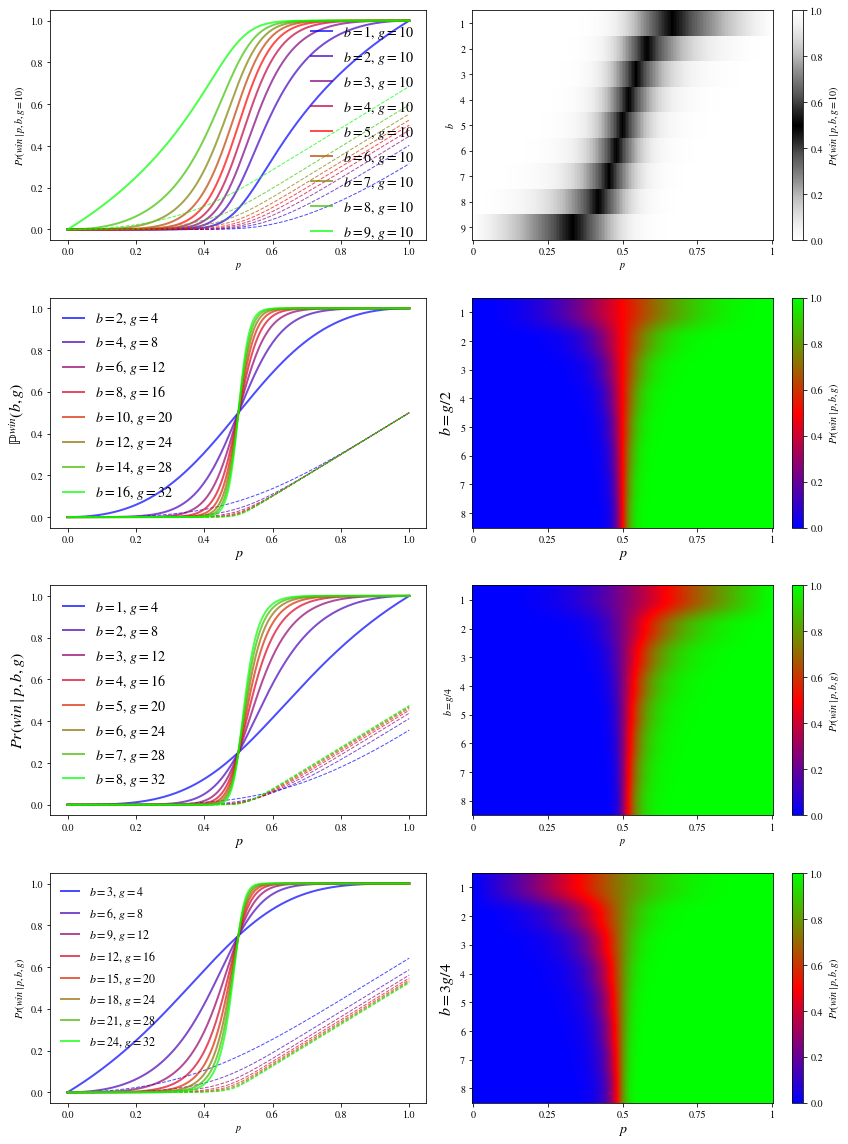

In [ ]:
#------------------------------------------------------------------------------
# Gamblers's Ruin Functions:
#------------------------------------------------------------------------------

# - probability of winning : conditional prob function P(win | p, b, g)
#win_prob  = lambda p, b, g : (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g) if (p!=0.5)  else  b/g
def win_prob(p, b, g):
  if (p == 0):
    return 0
  elif (p == 1):
    return 1
  elif (p == 0.5):
    return b/g
  else:
    return (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g)

# - cumulative probability of winning
win_cumu  = lambda p_sup, b, g, p_inf=0 : integral(win_prob, p_inf, p_sup, (b, g), points=[0, 0.5, 1])[0]
#win_cumu  = lambda p_sup, b, g : integral(lambda p, b, g : (1-((1.-p)/p)**b) / (1-((1.-p)/p)**g)  if (p!=0.5)  else  b/g, 0, p_sup, (b, g))[0]
#win_cumu  = lambda p, b, g : integral(win_prob, 0, p, (b, g))[0] if p < 0.5 else integral(win_prob, 0, 0.5, (b, g))[0] + integral(win_prob, 0.5, p, (b, g))[0]

win_area  = lambda b, g : win_cumu(1, b, g)

#------------------------------------------------------------------------------
# Gamblers's Ruin - Win Probabilities Visualization:
#------------------------------------------------------------------------------

greys_cm = cm.get_cmap('Greys', 256)
newcolors = np.vstack((greys_cm(np.linspace(0, 1, 256)), greys_cm(np.linspace(1, 0, 256))))
centerbw_cm = ListedColormap(newcolors, name='centerbw')

#samples for p
arr_p_size = 201

arr_p = np.linspace(0, 1, arr_p_size)
arr_q = 1 - arr_p

# b is the budget
arr_b = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
g = 10

#number of cases
arr_b_size = len(arr_b)

#win_prob given budget
win_prob_b = np.zeros((arr_b_size, arr_p_size))
win_cumu_b = np.zeros((arr_b_size, arr_p_size))

for idx_b in range(arr_b_size):
  for idx_p in range(arr_p_size):
    win_prob_b[idx_b][idx_p] = win_prob(arr_p[idx_p], arr_b[idx_b], g)
    win_cumu_b[idx_b][idx_p] = win_cumu(arr_p[idx_p], arr_b[idx_b], g)

arr_color_idx = np.linspace(0, 1, arr_b_size)

fig, ax = plt.subplots(4, 2, figsize=(12, 16))

for idx_b in range(arr_b_size):
  ax[0,0].plot(arr_p, win_prob_b[idx_b] , color=plt.cm.brg(arr_color_idx[idx_b]), lw=2, alpha=0.7, label='$b=' + str(arr_b[idx_b]) + '$, $g=10$')
  ax[0,0].plot(arr_p, win_cumu_b[idx_b] , color=plt.cm.brg(arr_color_idx[idx_b]), linestyle='--', lw=1, alpha=0.7)
ax[0,0].legend(loc='best', frameon=False)
ax[0,0].set_xlabel("$p$")
ax[0,0].set_ylabel("$Pr(win \mid p, b, g=10)$")

ax[0,1].set_xticks([0,50,100,150,200])
ax[0,1].set_yticks(range(arr_b_size))
ax[0,1].set_xticklabels([0, 0.25, 0.5, 0.75, 1])
ax[0,1].set_yticklabels(arr_b)
im = ax[0,1].imshow(win_prob_b, cmap=centerbw_cm, aspect='auto', interpolation='none')
ax[0,1].set_ylabel("$b$")
ax[0,1].set_xlabel("$p$")
fig.colorbar(im, ax=ax[0,1], label="$Pr(win \mid p, b, g=10)$")

##############################################

# g is the total fortune
arr_g = np.array([4, 8, 12, 16, 20, 24, 28, 32])
arr_g_size = len(arr_g)

arr_color_idx = np.linspace(0, 1, arr_g_size)

win_prob_g = np.zeros((arr_g_size, arr_p_size))
win_cumu_g = np.zeros((arr_g_size, arr_p_size))

for idx_g in range(arr_g_size):
  for idx_p in range(arr_p_size):
    win_prob_g[idx_g][idx_p] = win_prob(arr_p[idx_p], arr_g[idx_g] // 2, arr_g[idx_g])
    win_cumu_g[idx_g][idx_p] = win_cumu(arr_p[idx_p], arr_g[idx_g] // 2, arr_g[idx_g])

for idx_g in range(arr_g_size):
  ax[1,0].plot(arr_p, win_prob_g[idx_g] , color=plt.cm.brg(arr_color_idx[idx_g]), lw=2, alpha=0.7, label='$b=' + str(arr_g[idx_g]//2) + '$, $g=' + str(arr_g[idx_g]) + '$')
  ax[1,0].plot(arr_p, win_cumu_g[idx_g] , color=plt.cm.brg(arr_color_idx[idx_g]), linestyle='--', lw=1, alpha=0.7)
ax[1,0].legend(loc='best', frameon=False)
ax[1,0].set_xlabel(r"$p$", fontsize=14)
ax[1,0].set_ylabel(r"$\mathrm{\mathbb{P}}^\mathit{win}(b, g)$", fontsize=16)

ax[1,1].set_xticks([0,50,100,150,200])
ax[1,1].set_yticks(range(arr_b_size))
ax[1,1].set_xticklabels([0, 0.25, 0.5, 0.75, 1])
ax[1,1].set_yticklabels(arr_b)
im = ax[1,1].imshow(win_prob_g, cmap='brg', aspect='auto')
ax[1,1].set_ylabel("$b = g/2$", fontsize=16)
ax[1,1].set_xlabel("$p$", fontsize=14)
fig.colorbar(im, ax=ax[1,1], label="$Pr(win \mid p, b, g)$")

##############################################

for idx_g in range(arr_g_size):
  for idx_p in range(arr_p_size):
    win_prob_g[idx_g][idx_p] = win_prob(arr_p[idx_p], arr_g[idx_g] // 4, arr_g[idx_g])
    win_cumu_g[idx_g][idx_p] = win_cumu(arr_p[idx_p], arr_g[idx_g] // 4, arr_g[idx_g])

for idx_g in range(arr_g_size):
  ax[2,0].plot(arr_p, win_prob_g[idx_g] , color=plt.cm.brg(arr_color_idx[idx_g]), lw=2, alpha=0.7, label='$b=' + str(arr_g[idx_g]//4) + '$, $g=' + str(arr_g[idx_g]) + '$')
  ax[2,0].plot(arr_p, win_cumu_g[idx_g] , color=plt.cm.brg(arr_color_idx[idx_g]), linestyle='--', lw=1, alpha=0.7)
ax[2,0].legend(loc='best', frameon=False)
ax[2,0].set_xlabel("$p$", fontsize=14)
ax[2,0].set_ylabel("$Pr(win \mid p, b, g)$", fontsize=16)

ax[2,1].set_xticks([0,50,100,150,200])
ax[2,1].set_yticks(range(arr_b_size))
ax[2,1].set_xticklabels([0, 0.25, 0.5, 0.75, 1])
ax[2,1].set_yticklabels(arr_b)
im = ax[2,1].imshow(win_prob_g, cmap='brg', aspect='auto')
ax[2,1].set_ylabel("$b = g/4$")
ax[2,1].set_xlabel("$p$")
fig.colorbar(im, ax=ax[2,1], label="$Pr(win \mid p, b, g)$")

##############################################

for idx_g in range(arr_g_size):
  for idx_p in range(arr_p_size):
    win_prob_g[idx_g][idx_p] = win_prob(arr_p[idx_p], (arr_g[idx_g] // 4) * 3, arr_g[idx_g])
    win_cumu_g[idx_g][idx_p] = win_cumu(arr_p[idx_p], (arr_g[idx_g] // 4) * 3, arr_g[idx_g])

for idx_g in range(arr_g_size):
  ax[3,0].plot(arr_p, win_prob_g[idx_g] , color=plt.cm.brg(arr_color_idx[idx_g]), lw=2, alpha=0.7, label='$b=' + str((arr_g[idx_g]//4)*3) + '$, $g=' + str(arr_g[idx_g]) + '$')
  ax[3,0].plot(arr_p, win_cumu_g[idx_g] , color=plt.cm.brg(arr_color_idx[idx_g]), linestyle='--', lw=1, alpha=0.7)
ax[3,0].legend(loc='best', frameon=False, fontsize=12)
ax[3,0].set_xlabel("$p$")
ax[3,0].set_ylabel("$Pr(win \mid p, b, g)$")

ax[3,1].set_xticks([0,50,100,150,200])
ax[3,1].set_yticks(range(arr_b_size))
ax[3,1].set_xticklabels([0, 0.25, 0.5, 0.75, 1])
ax[3,1].set_yticklabels(arr_b)
im = ax[3,1].imshow(win_prob_g, cmap='brg', aspect='auto')
ax[3,1].set_ylabel(r"$b = 3g/4$", fontsize=16)
ax[3,1].set_xlabel(r"$p$", fontsize=14)
fig.colorbar(im, ax=ax[3,1], label=r"$Pr(win \mid p, b, g)$")

##############################################

fig.tight_layout()

if save_pics:
  plt.savefig('w_probs.pdf', bbox_inches='tight')

plt.show()

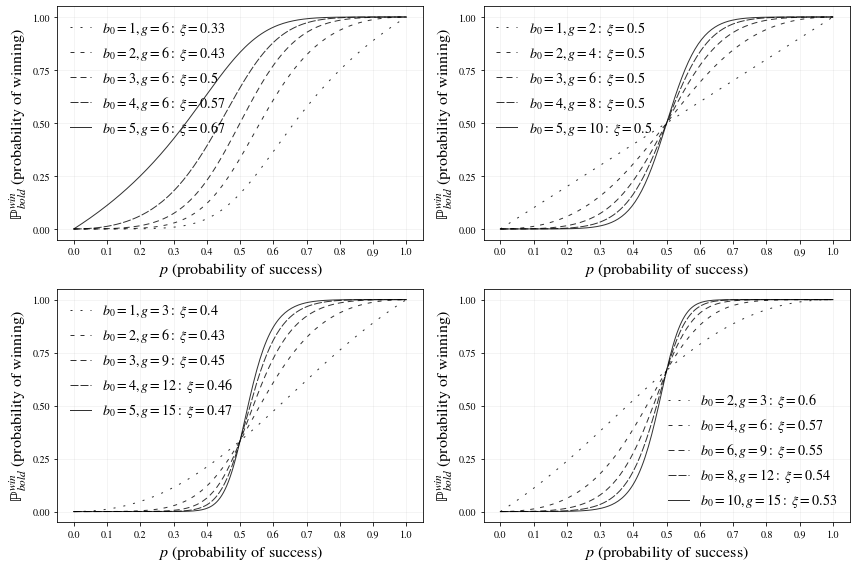

In [ ]:
#------------------------------------------------------------------------------
# Gamblers's Ruin - Win Probabilities Visualization (alternative):
#------------------------------------------------------------------------------

#samples for p
arr_p_size = 201
arr_p = np.linspace(0, 1, arr_p_size)

# b is the budget, g is the total fortune
arr_b = np.array([[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]],[[1, 2, 3, 4, 5], [2, 4, 6, 8,10]]])
arr_g = np.array([[[6, 6, 6, 6, 6], [2, 4, 6, 8,10]],[[3, 6, 9,12,15], [3, 6, 9,12,15]]])
rows = np.shape(arr_b)[0]
cols = np.shape(arr_b)[1]

#win_prob given budget
win_prob_arr = [[[[win_prob(p, b, g) for p in arr_p] for b, g in zip(arr_b[i][j], arr_g[i][j]) ] for j in range(cols) ] for i in range(rows) ]
win_area_arr = [[[win_area(b, g) for b, g in zip(arr_b[i][j], arr_g[i][j]) ] for j in range(cols) ] for i in range(rows) ]

arr_linestyle = [(0, (2, 8)), (0, (4, 6)), (0, (6, 4)), (0, (8, 2)), '-']

fig, ax = plt.subplots(rows, cols, figsize=(12, 8))

plots=[]
for i in range(rows):
  for j in range(cols):
    for b, g, pw, xi, ls in zip(arr_b[i][j], arr_g[i][j], win_prob_arr[i][j], win_area_arr[i][j], arr_linestyle):
      plots += ax[i][j].plot(arr_p, pw, linestyle=ls, color='k', lw=1, alpha=0.8, label=f'$b_0={str(b)}, g={str(g)}: \ \\xi = {str(round(xi, 2))}$')
    ax[i][j].set_xlabel(r"$p \ \mathrm{(probability \ of \ success)}$", fontsize=16)
    ax[i][j].set_ylabel(r"$\mathrm{\mathbb{P}}^\mathit{win}_\mathit{bold} \ \mathrm{(probability \ of \ winning)}$", fontsize=16)
    ax[i][j].set_yticks(np.linspace(0, 1, 5))
    ax[i][j].set_xticks(np.linspace(0, 1, 11))
    ax[i][j].grid(color='grey', alpha=0.1, linestyle='solid', which='both')
    ax[i][j].legend(loc='best', frameon=False, fontsize=14)
#    for plot in plots:
#      print(plot.get_label())

fig.tight_layout()

if save_pics:
  plt.savefig('win_probs.pdf', bbox_inches='tight')

plt.show()

#files.download('win_probs.pdf')

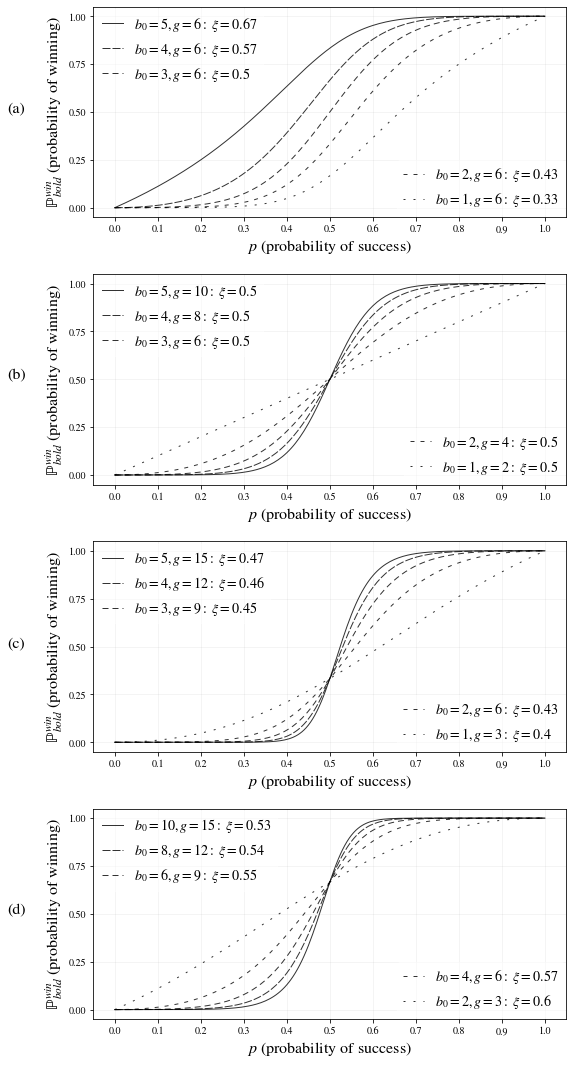

In [ ]:
fig, ax = plt.subplots(rows*cols, 1, figsize=(8, 15))

indices = ['(a)', '(b)', '(c)', '(d)']
for k in range(rows*cols):
  i=k//2
  j=k%2
  plots= []
  for b, g, pw, xi, ls in zip(arr_b[i][j], arr_g[i][j], win_prob_arr[i][j], win_area_arr[i][j], arr_linestyle):
    plots += ax[k].plot(arr_p, pw, linestyle=ls, color='k', lw=1, alpha=0.8, label=f'$b_0={str(b)}, g={str(g)}: \ \\xi = {str(round(xi, 2))}$')
  ax[k].set_xlabel(r"$p \ \mathrm{(probability \ of \ success)}$", fontsize=16)
  ax[k].set_ylabel(r"$\mathrm{\mathbb{P}}^\mathit{win}_\mathit{bold} \ \mathrm{(probability \ of \ winning)}$", fontsize=16)
  ax[k].set_yticks(np.linspace(0, 1, 5))
  ax[k].set_xticks(np.linspace(0, 1, 11))
  ax[k].grid(color='grey', alpha=0.1, linestyle='solid')
  ax[k].text(-0.25, 0.5, indices[k], fontsize=16)
  if k > 0:
    artist1 = ax[k].legend(handles=plots[:1:-1],  loc='upper left', frameon=True, fontsize=14, facecolor='w', framealpha=0.5, borderaxespad=0.2, edgecolor='w')
    artist2 = ax[k].legend(handles=plots[1::-1], loc='lower right', frameon=True, fontsize=14, facecolor='w', framealpha=0.5, borderaxespad=0.2, edgecolor='w')
    ax[k].add_artist(artist1)
  else:
    artist1 = ax[k].legend(handles=plots[:1:-1],  loc='upper left', frameon=True, fontsize=14, facecolor='w', framealpha=0.5, borderaxespad=0.2, edgecolor='w')
    artist2 = ax[k].legend(handles=plots[1::-1], loc='lower right', frameon=True, fontsize=14, facecolor='w', framealpha=0.5, borderaxespad=0.2, edgecolor='w')
    ax[k].add_artist(artist1)

fig.tight_layout()

if save_pics:
  plt.savefig('win_probs.pdf', bbox_inches='tight')

plt.show()

#files.download('win_probs.pdf')

In [ ]:
#------------------------------------------------------------------------------
# Basic Methods:
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
#incomplete beta function
inc_beta_func = lambda alpha, beta, p_sup : reg_inc_beta_func(alpha, beta, p_sup) * beta_func(alpha, beta)

#------------------------------------------------------------------------------
#eta funcion (normalizing constant for beta pdf with uniform prior)
eta_func = lambda x, y : (x+y+1) * binom(x+y, x)    #stable and quick

#------------------------------------------------------------------------------
# - true mean estimation (or bayesian mode)
beta_post_mode = estimated_p_freq = posit_freq_prob = lambda k, z, prior_p=0.5 : k / (k+z) if (k+z) > 0 else prior_p

# - bayesian mean estimation
beta_post_mean = estimated_p_bayes = lambda k, z, prior_k=1, prior_z=1 : (k+prior_k)/(k+z+prior_k+prior_z)
#beta_post_mean = estimated_p_bayes = lambda k, z, prior_k=1, prior_z=1 : beta_dist.mean(k+prior_k, z+prior_z)

# - bayesian median estimation
beta_post_medi = lambda k, z, prior_k=1, prior_z=1 : beta_dist.median(k+prior_k, z+prior_z)

beta_post_pdf = lambda p, k, z : beta_dist.pdf(p, k+1, z+1)
beta_post_cdf = lambda p_sup, k, z : beta_dist.cdf(p_sup, k+1, z+1)

expected_r = lambda p : 2*p - 1

# - estimated probabilities of r using beta x expected_r
r_beta_prob = lambda p, k, z : expected_r(p) * beta_post_pdf(p, k, z)
# - cumulative estimated probability of winning using beta x win_prob
r_beta_cumu = lambda p_sup, k, z : integral(r_beta_prob, 0, p_sup, args=(k, z))[0]
# - total cumulative sum of estimated probability of winning using beta x win_prob
r_beta_area = lambda k, z : r_beta_cumu(1, k, z)
expected_beta_r = lambda k, z : beta_dist.expect(expected_r, args=(k+1, z+1), loc=0, scale=1, lb=0, ub=1, conditional=False)

#expected_beta_posit = lambda k, z : beta_dist.expect(args=(k+1, z+1), loc=0, scale=1, lb=0, ub=1, conditional=False)
expected_beta_posit = lambda k, z : beta_post_cdf(0.5, k, z)
expected_beta_negat = lambda k, z : 1 - expected_beta_posit

#------------------------------------------------------------------------------
# - estimated probability of winning using beta x win_prob
win_beta_prob = lambda p, k, z, b, g : win_prob(p, b, g) * beta_post_pdf(p, k, z)
# - cumulative estimated probability of winning using beta x win_prob
win_beta_cumu = lambda p_sup, k, z, b, g : integral(win_beta_prob, 0, p_sup, args=(k, z, b, g))[0]
# - total cumulative sum of estimated probability of winning using beta x win_prob
win_beta_area = lambda k, z, b, g : win_beta_cumu(1, k, z, b, g)
#expected_win_beta = lambda k, z, b, g : beta_dist.expect(win_prob, args=(k+1, z+1), loc=0, scale=1, lb=0, ub=1, conditional=False, args=(b, g))

#------------------------------------------------------------------------------
# - probability of ruin : conditional prob function P(ruin | p, b)
ruin_prob_inf  = lambda p, b : ((1.-p)**b / p**b)  if (p>0.5)  else  1.0             # = ((1-p)/p)**b
# - cumulative probability of ruin
#ruin_cumu =  lambda p_sup, b : integral(ruin_prob, 0.5, p_sup, (b))[0]
ruin_cumu  =  lambda p_sup, b : 0.5 + integral(lambda p, b : (1.-p)**b/p**b, 0.5, p_sup, (b))[0]  if (p_sup>0.5) else  p_sup
# - total cumulative sum of estimated probability of ruin using beta x ruin_prob
ruin_area  =  lambda b : ruin_cumu(1., b)
# - extended probability of ruin (extrapolated out of bounds)
ruin_func  = lambda p, b : ((1.-p)**b / p**b)  if (p>0)  else  float('+inf')   # = ((1-p)/p)**b
# - ruin inverse factor
#ruin_fact = lambda p, b : 1 / (1 + ruin_func(p,b))
ruin_fact  = lambda p, b : (p**b) / (p**b + (1.-p)**b)
# - ruin cumulative inverse factor
ruin_cufa = lambda p, b : integral(ruin_fact, 0., p, (b))[0]

#------------------------------------------------------------------------------
# - estimated time-horizon = E(tau | p, b)
tau_estm  =  lambda p, b : (b / (1. - 2.*p))  if  (p < 0.5)   else  float('inf')   # = (b / (q - p))
# - function time-horizon (extrapolated out of bounds)
tau_func =  lambda p, b : (b / (1. - 2.*p))  if  (p != 0.5)  else  float('inf')   # = (b / (q - p))
# - tau inverse factor
#tau_fact     = lambda p, b : (1 - 2*p) / b
#tau_fact =  lambda p, b : ((1 - 2*p) / b)  if  (b > 0)     else  float('inf')   # = (1 / (b / (q - p)))  =  ((q - p) / b)
tau_fact     = lambda p, b : (b + 2.*p - 1.) / (2.*b)   # = 1 - ((((1 - 2*p) / b) + 1) / 2)
# - tau cumulative inverse factor
#tau_cufa = lambda p, b : (p - p**2) / b  # = integral(tau_fact, 0, p, (b))[0]
# - transformed tau inverse factor for PDF
tau_pdf = lambda p, b : (((1. - 2.*p) / b) + 1)
# - transformed tau inverse factor CDF
tau_cdf = lambda p, b : (b*p - p**2. + p) / b  # = integral(tau_fact_pdf, 0, p, (b))[0]
#
#x_factor         = lambda p, b : (((2*p - 1) / b) + 1) / 2
#x_factor_pdf     = lambda p, b : (((2*p - 1) / b) + 1)

#------------------------------------------------------------------------------
# - estimated probability of ruin using beta x ruin_prob
#ruin_beta_prob = lambda p, k, z, b : ruin_prob(p, b) * beta_post_pdf(p, k, z)
ruin_beta_prob = lambda p, k, z, b : (1 / beta_func(k+1, z+1)) * p**k * (1-p)**z * ((1-p)/p)**b  if  (p > 0.5)  else  (1 / beta_func(k+1, z+1)) * p**k * (1-p)**z
# - cumulative estimated probability of ruin using beta x ruin_prob
ruin_beta_cumu = lambda p, k, z, b : integral(ruin_beta_prob, 0, p, (k, z, b))[0]
# - total cumulative sum of estimated probability of ruin using beta x ruin_prob
ruin_beta_area = lambda k, z, b : ruin_beta_cumu(1, k, z, b)

#------------------------------------------------------------------------------
# - estimated probability of ruin using beta x ruin_func
ruin_beta_func = lambda p, k, z, b : ruin_func(p, b) * beta_post_pdf(p, k, z)
# - cumulative estimated probability of ruin using beta x ruin_func
ruin_beta_cufu = lambda p, k, z, b : integral(ruin_beta_func, 0, p, (k, z, b))[0]
# - total cumulative sum of estimated probability of ruin using beta x ruin_func
ruin_beta_arfu = lambda k, z, b : ruin_beta_cufu(1, k, z, b)

#------------------------------------------------------------------------------
# - estimated probability of ruin using beta x ruin_fact
ruin_beta_fact = lambda p, k, z, b : ruin_fact(p, b) * beta_post_pdf(p, k, z)
# - cumulative estimated probability of ruin using beta x ruin_fact
ruin_beta_cufa = lambda p, k, z, b : integral(ruin_beta_fact, 0, p, (k, z, b))[0]
# - total cumulative sum of estimated probability of ruin using beta x ruin_fact
ruin_beta_arfa = lambda k, z, b : ruin_beta_cufa(1, k, z, b)

#------------------------------------------------------------------------------
# - estimated tau using beta x tau_fact
tau_beta_fact = lambda p, k, z, b : tau_fact(p, b) * beta_post_pdf(p, k, z)
# - cumulative estimated probability of ruin using beta x ruin_fact
tau_beta_cufa = lambda p, k, z, b : integral(tau_beta_fact, 0, p, (k, z, b))[0]
# - total cumulative sum of estimated probability of ruin using beta x ruin_fact
tau_beta_arfa = lambda k, z, b : tau_beta_cufa(1, k, z, b)

#ruin_est_func_for_total = lambda p, x, y, b : (1 / beta_func(x+1, y+1)) * p**x * (1-p)**y * ((1-p)/p)**b
#ruin_est_func_for_total = lambda p, x, y, b : ((1-p)/p)**b * beta.pdf(p, x+1, y+1)
#ruin_total_est_func = lambda x, y, b : beta_dist.cdf(0.5, x+1, y+1) + integral(ruin_est_func_for_total, 0.5, 1.0, (x, y, b))[0]
#ruin_total_est_func = lambda x, y, b : beta_dist.cdf(0.5, x+1, y+1) + integral(lambda p, x, y, b : ((1-p)/p)**b * beta_dist.pdf(p, x+1, y+1), 0.5, 1.0, (x, y, b))[0]

#------------------------------------------------------------------------------
#estimated tau factor
#x_est_factor_pdf     = lambda p, x, y, b : x_factor_pdf(p,b)  *  beta.pdf(p, x+1, y+1)
#x_est_factor_pdf     = lambda p, x, y, b : (((2*p - 1) / b) + 1)  *  (1 / beta_func(x+1, y+1)) * p**x * (1-p)**y
#x_est_factor_cdf     = lambda p, x, y, b : integral(x_est_factor_pdf, 0, p, (x,y,b))[0]

#surv_est_factor_pdf = lambda p, x, y, b : surv_factor(p,b)  *  beta.pdf(p, x+1, y+1)
#surv_est_factor_pdf = lambda p, x, y, b : integral(surv_factor, 0, p, (b))[0]
#surv_est_factor_cdf = lambda p, x, y, b : integral(surv_est_factor_pdf, 0, p, (x,y,b))[0]

loss_prob = lambda p : 1. - p  #  = q
#loss_beta_area = lambda x, y : beta_dist.expect(loss_prob, (x+1, y+1))
loss_beta_area = lambda k, z : 1. - beta_post_mean(k, z)



In [ ]:
# b is the budget
arr_b = np.array([1, 9])
arr_b_size = 2

#total fortune
g = 10

#number of cases
arr_n_size = 7

# k is the nuber of successes
arr_k = np.array([0, 1, 1, 2, 20, 1, 10])
# z is the nuber of fails
arr_z = np.array([0, 1, 2, 1, 1, 20, 10])

#alpha and beta parameters considering uniform prior
#arr_alpha = arr_k+1
#arr_beta = arr_z+1

arr_expected_r = expected_r(arr_p)

#win_prob given budget
win_prob_bp = np.zeros((arr_b_size,arr_p_size))
win_cumu_bp = np.zeros((arr_b_size,arr_p_size))
for idx_b in range(arr_b_size):
  for idx_p in range(arr_p_size):
    win_prob_bp[idx_b][idx_p] = win_prob(arr_p[idx_p], arr_b[idx_b], g)
    win_cumu_bp[idx_b][idx_p] = win_cumu(arr_p[idx_p], arr_b[idx_b], g)

#prepare 
beta_pdf_np = np.zeros((arr_n_size, arr_p_size))
beta_cdf_np = np.zeros((arr_n_size, arr_p_size))
beta_mean_n = np.zeros((arr_n_size))
beta_medi_n = np.zeros((arr_n_size))
beta_mode_n = np.zeros((arr_n_size))
win_beta_prob_nbp = np.zeros((arr_n_size, arr_b_size, arr_p_size))
win_beta_cumu_nbp = np.zeros((arr_n_size, arr_b_size, arr_p_size))
r_beta_prob_nbp = np.zeros((arr_n_size, arr_p_size))
r_beta_cumu_nbp = np.zeros((arr_n_size, arr_p_size))

for idx_n in range(arr_n_size):
  for idx_p in range(arr_p_size):
    r_beta_prob_nbp[idx_n][idx_p] = r_beta_prob(arr_p[idx_p], arr_k[idx_n], arr_z[idx_n])
    r_beta_cumu_nbp[idx_n][idx_p] = r_beta_cumu(arr_p[idx_p], arr_k[idx_n], arr_z[idx_n])
  for idx_b in range(arr_b_size):
    beta_pdf_np[idx_n] = beta_post_pdf(arr_p, arr_k[idx_n], arr_z[idx_n])  
    beta_cdf_np[idx_n] = beta_post_cdf(arr_p, arr_k[idx_n], arr_z[idx_n])  
    beta_mean_n[idx_n] = beta_post_mean(arr_k[idx_n], arr_z[idx_n])
    beta_medi_n[idx_n] = beta_post_medi(arr_k[idx_n], arr_z[idx_n])
    beta_mode_n[idx_n] = beta_post_mode(arr_k[idx_n], arr_z[idx_n])
    for idx_p in range(arr_p_size):
      win_beta_prob_nbp[idx_n][idx_b][idx_p] = win_beta_prob(arr_p[idx_p], arr_k[idx_n], arr_z[idx_n], arr_b[idx_b], g)
      win_beta_cumu_nbp[idx_n][idx_b][idx_p] = win_beta_cumu(arr_p[idx_p], arr_k[idx_n], arr_z[idx_n], arr_b[idx_b], g)


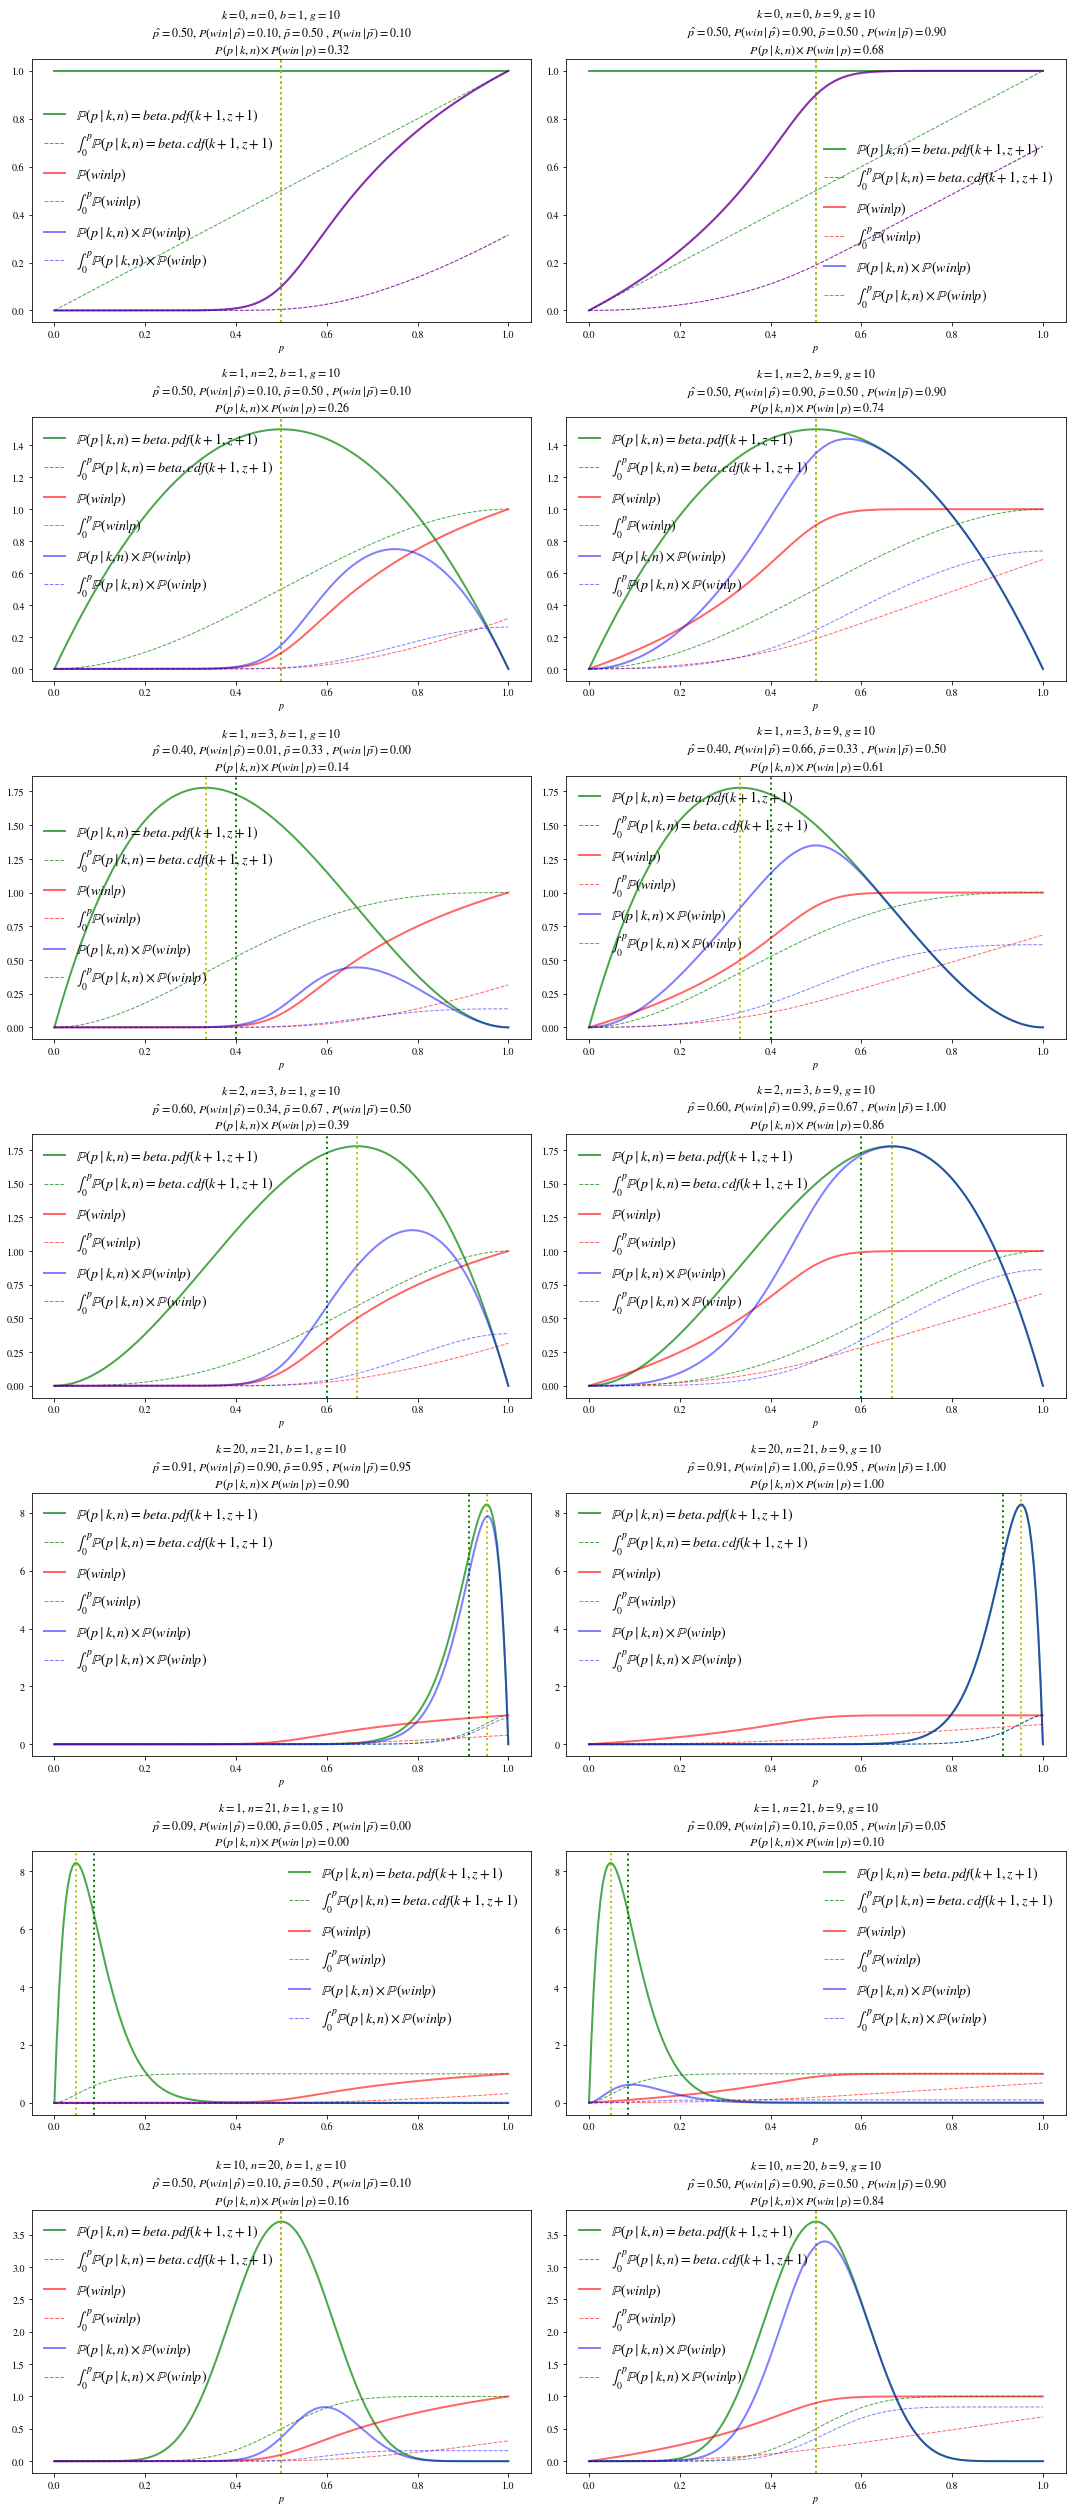

In [ ]:
fig, ax = plt.subplots(arr_n_size, arr_b_size, figsize=(15, 35))
plt.subplots_adjust(hspace=0.5)

for idx_n in range(arr_n_size):
  k = arr_k[idx_n]
  z = arr_z[idx_n]
  phat = beta_mean_n[idx_n]
  pbar = beta_mode_n[idx_n]
  for idx_b in range(arr_b_size):
    b = arr_b[idx_b]
    pwhat = win_prob(phat, b, g)
    pwbar = win_prob(pbar, b, g)
    pw0 = win_prob(0.5, b, g)
    pwuni = win_beta_area(0, 0, b, g)
    pw = win_beta_area(k, z, b, g)
    #$P(win \\mid p=0.5) ={pw0:.2f}$, $P(win \mid U(p)) ={pwuni:.2f}$ \n
    ax[idx_n, idx_b].set_title(f'$k={k}$, $n={z+k}$, $b={b}$, $g={g}$ \n $\\hat p={phat:.2f}$, $P(win \\mid \\hat p)={pwhat:.2f}$, $\\bar p={pbar:.2f}$ , $P(win \\mid \\bar p)={pwbar:.2f}$ \n $P(p \mid k, n) \\times P(win \\mid p) = {pw:.2f}$')
    ax[idx_n, idx_b].plot(arr_p, beta_pdf_np[idx_n] , 'g-', lw=2, alpha=0.7, label=r'$\mathbb{P}(p \mid k, n) = beta.pdf(k+1, z+1)$')
    ax[idx_n, idx_b].plot(arr_p, beta_cdf_np[idx_n] , 'g--', lw=1, alpha=0.7, label=r'$\int_0^p \mathbb{P}(p \mid k, n) = beta.cdf(k+1, z+1)$')
    ax[idx_n, idx_b].axvline(x=beta_mean_n[idx_n], color='g', lw=2, linestyle=':')
    #ax[idx_n, idx_b].axvline(x=beta_medi_n[idx_n], color='m', lw=2, linestyle=':')
    ax[idx_n, idx_b].axvline(x=beta_mode_n[idx_n], color='y', lw=2, linestyle=':')
    ax[idx_n, idx_b].plot(arr_p, win_prob_bp[idx_b] , 'r-',  lw=2, alpha=0.6, label='$\mathbb{P}(win | p)$')
    ax[idx_n, idx_b].plot(arr_p, win_cumu_bp[idx_b] , 'r--', lw=1, alpha=0.6, label='$\int_0^p \mathbb{P}(win | p)$')
    ax[idx_n, idx_b].plot(arr_p, win_beta_prob_nbp[idx_n][idx_b] , 'b-' , lw=2, alpha=0.5, label='$\mathbb{P}(p \mid k, n) \\times \mathbb{P}(win | p) $')
    ax[idx_n, idx_b].plot(arr_p, win_beta_cumu_nbp[idx_n][idx_b] , 'b--', lw=1, alpha=0.5, label='$\int_0^p \mathbb{P}(p \mid k, n) \\times \mathbb{P}(win | p) $')
    ax[idx_n, idx_b].set_xlabel('$p$')
    ax[idx_n, idx_b].legend(loc='best', frameon=False)

fig.tight_layout()

if save_pics:
  plt.savefig('beta_win_examples.pdf', bbox_inches='tight')

plt.show()

In [ ]:
#suppose a grid of col_size x row_size machines
col_size = 3
row_size = 3

#then k slot machines
cell_count = col_size * row_size

# k is the nuber of successes
arr_k = np.array(
    [[1, 10, 100],
     [2, 20, 200],
     [3, 30, 300]])

# z is the nuber of fails
arr_z = np.array(
    [[3, 30, 300],
     [2, 20, 200],
     [1, 10, 100]])

p=0.7
q=1-p
# k is the nuber of successes
arr_k = np.array(
    [[p*5, p*10, p*15],
     [p*20, p*25, p*30],
     [p*35, p*40, p*45]])

# z is the nuber of fails
arr_z = np.array(
    [[q*5, q*10, q*15],
     [q*20, q*25, q*30],
     [q*35, q*40, q*45]])

#prior = [1, 1]

#alpha and beta parameters considering prior
arr_alpha = arr_k+1
arr_beta = arr_z+1

#fixed budget
b = 3
g = 10

#win_prob given budget
win_prob_p = np.zeros((arr_p_size))
win_cumu_p = np.zeros((arr_p_size))
for idx_p in range(arr_p_size):
    win_prob_p[idx_p] = win_prob(arr_p[idx_p], b, g)
    win_cumu_p[idx_p] = win_cumu(arr_p[idx_p], b, g)

beta_pdf_ijp = np.zeros((col_size, row_size, arr_p_size))
beta_cdf_ijp = np.zeros((col_size, row_size, arr_p_size))
beta_mean_ij = np.zeros((col_size, row_size))
beta_medi_ij = np.zeros((col_size, row_size))
beta_mode_ij = np.zeros((col_size, row_size))

win_beta_prob_ijp = np.zeros((col_size, row_size, arr_p_size))
win_beta_cumu_ijp = np.zeros((col_size, row_size, arr_p_size))

for i in range(col_size):
  for j in range(row_size):
    beta_pdf_ijp[i][j] = beta_dist.pdf(arr_p, arr_alpha[i][j], arr_beta[i][j])  
    beta_cdf_ijp[i][j] = beta_dist.cdf(arr_p, arr_alpha[i][j], arr_beta[i][j])  
    beta_mean_ij[i][j] = beta_dist.mean(arr_alpha[i][j], arr_beta[i][j])
    beta_medi_ij[i][j] = beta_dist.median(arr_alpha[i][j], arr_beta[i][j])
    #beta_mode_ij[i][j] = beta_mode(arr_k[i][j], arr_z[i][j])
    for idx_p in range(arr_p_size):
      win_beta_prob_ijp[i][j][idx_p] = win_beta_prob(arr_p[idx_p], arr_k[i][j], arr_z[i][j], b, g)
      win_beta_cumu_ijp[i][j][idx_p] = win_beta_cumu(arr_p[idx_p], arr_k[i][j], arr_z[i][j], b, g)


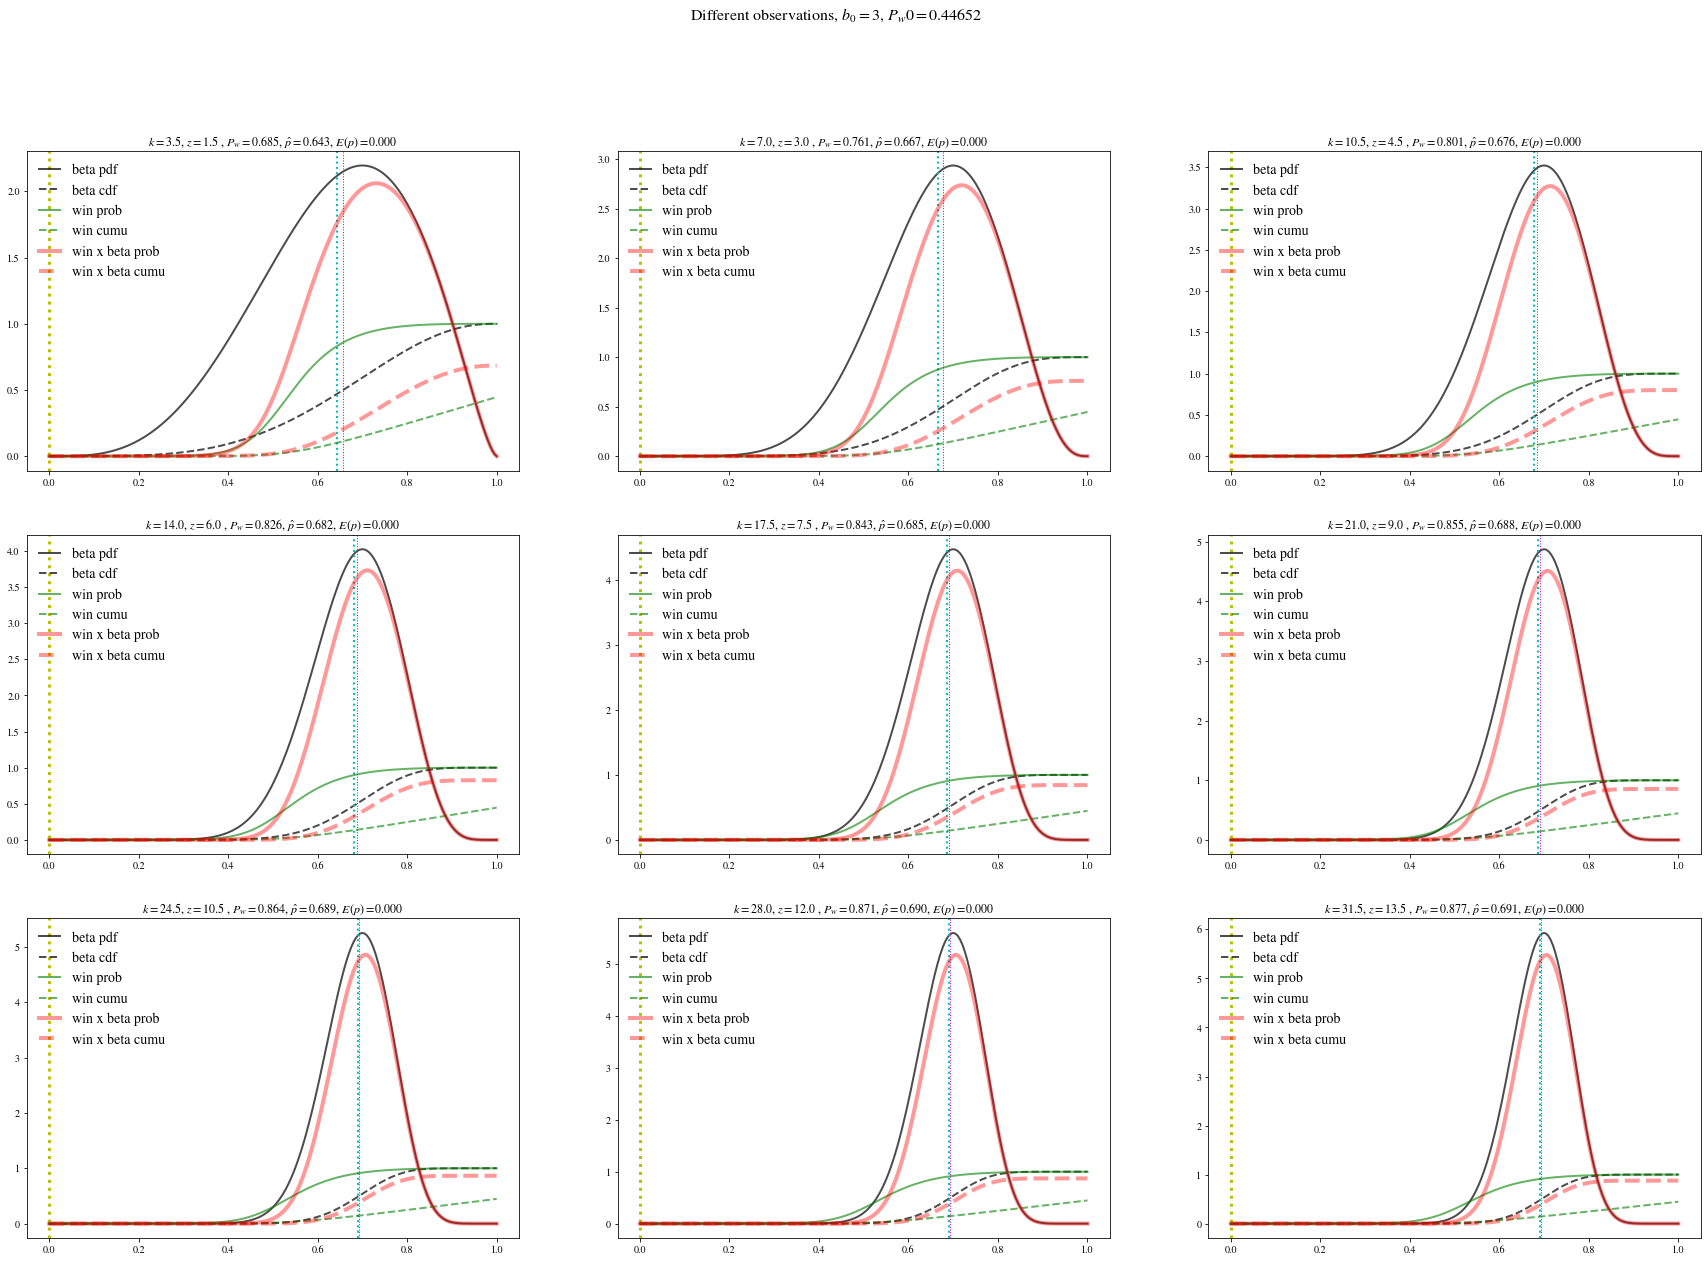

In [ ]:
fig, ax = plt.subplots(col_size, row_size, figsize=(30, 20))

fig.suptitle(f'Different observations, $b_0={b}$, $P_w0={win_beta_area(0, 0, b, g):.5f}$' , fontsize=16)

for i in range(col_size):
    for j in range(row_size):
        k = arr_k[i][j]
        z = arr_z[i][j]
        pw = win_beta_area(k, z, b, g)
        phat = beta_mean_ij[i][j]
        pbar = beta_mode_ij[i][j]
        ax[i,j].set_title(f'$k={k:.1f}$, $z={z:.1f}$ , $P_w={pw:.3f}$, $\\hat p={phat:.3f}$, $E(p)={pbar:.3f}$ ')
        #ax[i,j].set_xlabel('p')
        #ax[i,j].hist(samples[i][j], density=True, histtype='stepfilled', alpha=0.2)
        ax[i,j].plot(arr_p, beta_pdf_ijp[i][j] , 'k-', lw=2, alpha=0.7, label='beta pdf')
        ax[i,j].plot(arr_p, beta_cdf_ijp[i][j] , 'k--', lw=2, alpha=0.7, label='beta cdf')
        ax[i,j].axvline(x=beta_mean_ij[i][j], color='c', lw=2, linestyle=':')
        ax[i,j].axvline(x=beta_medi_ij[i][j], color='m', lw=1, linestyle=':')
        ax[i,j].axvline(x=beta_mode_ij[i][j], color='y', lw=3, linestyle=':')
        ax[i,j].plot(arr_p, win_prob_p , 'g-',  lw=2, alpha=0.6, label='win prob')
        ax[i,j].plot(arr_p, win_cumu_p , 'g--', lw=2, alpha=0.6, label='win cumu')
        ax[i,j].plot(arr_p, win_beta_prob_ijp[i][j] , 'r-' , lw=4, alpha=0.4, label='win x beta prob')
        ax[i,j].plot(arr_p, win_beta_cumu_ijp[i][j] , 'r--', lw=4, alpha=0.4, label='win x beta cumu')
        ax[i,j].legend(loc='best', frameon=False)
        
plt.show()


In [ ]:
# always chose play
def always_play_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  return True

# always chose quit
def always_quit_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  return False

# chose play if the known probability of succes is higher than the probability of fail
# or equivalently when the expected budget in the next step is higher than the current one 
def oracle_naive_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  return (p >= 0.5)

# chose play if the probability of winning the game given the known probability of succes is higher than the probability of being ruined
def oracle_simple_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  w = win_prob(p, b, g)
  return (w >= 0.5)

# chose play if the expected budget in the next step has a higher utility than the current one 
def oracle_local_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  return (((p * f(b+1, g)) + ((1-p) * f(b-1, g))) >= f(b, g))

# chose play if the expected budget at the end of the game has a higher utility than the current one 
def oracle_global_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  w = win_prob(p, b, g)
  return (((w * f(g, g)) + ((1-w) * f(0, g))) >= f(b, g))

# chose play if the estimated frequentist probability of succes is higher than the probability of fail
# or equivalently when the expected budget in the next step is higher than the current one 
def freq_naive_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  if (k+z>0):
    p_bar = k/(k+z)
    return (p_bar >= 0.5)
  else:
    return True

# chose play if the probability of winning the game given the estimated frequentist probability of succes is higher than the probability of being ruined
def freq_simple_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  if (k+z>0):
    p_bar = k/(k+z)
    w_bar = win_prob(p_bar, b, g)
    return (w_bar >= 0.5)
  else:
    return True

# chose play if the utility of the expected budget in the next step is higher than the current one 
def freq_local_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  if (k+z>0):
    p_bar = k/(k+z)
    return (((p_bar * f(b+1, g)) + ((1-p_bar) * f(b-1, g))) >= f(b, g))
  else:
    return True

# chose play if the expected budget at the end of the game given the frequentist estimation of p has a higher utility than the current one 
def freq_global_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  if (k+z>0):
    p_bar = k/(k+z)
    w_bar = win_prob(p_bar, b, g)
    return (((w_bar * f(g, g)) + ((1-w_bar) * f(0, g))) >= f(b, g))
  else:
    return True

def freq_final_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
  if (k+z>0):
    p_bar = k/(k+z)
    return (p_bar >= 0.5) or (p_bar*f(g, g) >= f(b,g))
  else:
    return True

def bayes_final_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    p_hat = (k+1)/(k+z+2)
    return (p_hat >= 0.5) or (p_hat*f(g, g) >= f(b,g))

def beta_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    return (win_beta_area(k, z, b, g)*f(g, g) >= f(b,g))

def opportunist_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    p_hat = (k+1)/(k+z+2)
    return (p_hat >= 0.5) or (win_beta_area(k, z, b, g)*f(g, g) >= f(b,g))

def bayes_naive_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    p_hat = (k+1)/(k+z+2)
    return (p_hat >= 0.5)

def bayes_simple_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    p_hat = (k+1)/(k+z+2)
    w_hat = win_prob(p_hat, b, g)
    return (w_hat >= 0.5)

def bayes_local_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    p_hat = (k+1)/(k+z+2)
    return (((p_hat * f(b+1, g)) + ((1-p_hat) * f(b, g))) >= f(b-1, g))

def bayes_global_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    p_hat = (k+1)/(k+z+2)
    w_hat = win_prob(p_hat, b, g)
    return (((w_hat * f(g, g)) + ((1-w_hat) * f(0, g))) >= f(b, g))

def our_naive_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    return (win_beta_cumu(0.5, k, z, b, g) >= 0.5)

def our_simple_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    return (win_beta_area(k, z, b, g) >= 0.5)

#def our_local_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
#    w = win_beta_area(k, z, b, g)
#    return (((w * f(b+1, g)) + ((1-w) * f(b-1, g))) > f(b, g))
# -> no sense !

def our_global_method(b, g, k=0, z=0, p=None, f=(lambda b, g : b)):
    w = win_beta_area(k, z, b, g)
    return (((w * f(g, g)) + ((1-w) * f(0, g))) >= f(b, g))


In [ ]:
%%time

#samples for p
arr_p_size = 201

arr_p = np.linspace(0, 1, arr_p_size)

arr_g_factor = [1, 5] # [1, 2, 3, 4, 5, 10]
arr_g_size = len(arr_g_factor)
g_base = 4

arr_b_base = [1, 2, 3]
arr_b_size = len(arr_b_base)

theoretical_always_quit = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_always_play = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_play_quit = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_oracle_naive = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_freq_naive = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_loss_two = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_always_quit_score = np.zeros((arr_b_size, arr_g_size))
theoretical_always_play_score = np.zeros((arr_b_size, arr_g_size))
theoretical_play_quit_score = np.zeros((arr_b_size, arr_g_size))
theoretical_oracle_naive_score = np.zeros((arr_b_size, arr_g_size))
theoretical_freq_naive_score = np.zeros((arr_b_size, arr_g_size))
theoretical_loss_two_score = np.zeros((arr_b_size, arr_g_size))

f = lambda b, g : b
#f = lambda b, g : b/g
#f = lambda b, g : 0 if b==0 else (+1 if b==g else 0.5)

#theoretical
for idx_g in range(arr_g_size): 
  g = g_base * arr_g_factor[idx_g]
  for idx_b in range(arr_b_size): 
    b0 = arr_b_base[idx_b] * arr_g_factor[idx_g]
    theoretical_always_quit[idx_b, idx_g] = np.repeat(f(b0,g), arr_p_size)
    theoretical_always_quit_score[idx_b, idx_g] = f(b0,g)
    theoretical_always_play[idx_b, idx_g] = np.array([f(win_prob(p, b0, g) * g, g) for p in arr_p]) 
    theoretical_always_play_score[idx_b, idx_g] = f(win_area(b0, g) * g, g)
    theoretical_play_quit[idx_b, idx_g] = np.array([f(win_prob(p, b0, g) * g, g) for p in arr_p])  if b0 <= g/2 else  np.repeat(f(b0,g), arr_p_size)
    theoretical_play_quit_score[idx_b, idx_g] = f(win_area(b0, g) * g, g)  if b0 <= g/2 else  f(b0,g)
    theoretical_oracle_naive[idx_b, idx_g] = np.array([f(win_prob(p, b0, g) * g if p > 0.5 else b0, g) for p in arr_p]) 
    theoretical_oracle_naive_score[idx_b, idx_g] = f((b0*0.5)+(win_cumu(1, b0, g, 0.5) * g), g)
    theoretical_freq_naive[idx_b, idx_g] = np.array([f( (win_prob(p, 1, g-b0+1) * g) + ((1-win_prob(p, 1, g-b0+1)) * (b0-1)), g) for p in arr_p]) 
    theoretical_freq_naive_score[idx_b, idx_g] = f((win_area(1, g-b0+1) * g) + ( (1-win_area(1, g-b0+1)) * (b0-1)), g)
    l = min(2, b0)
    theoretical_loss_two[idx_b, idx_g] = np.array([f( (win_prob(p, l, g-b0+l) * g) + ((1-win_prob(p, l, g-b0+l)) * (b0-l)), g) for p in arr_p]) 
    theoretical_loss_two_score[idx_b, idx_g] = f((win_area(l, g-b0+l) * g) + ( (1-win_area(l, g-b0+l)) * (b0-l)), g)


CPU times: user 25.3 ms, sys: 958 µs, total: 26.2 ms
Wall time: 28.6 ms


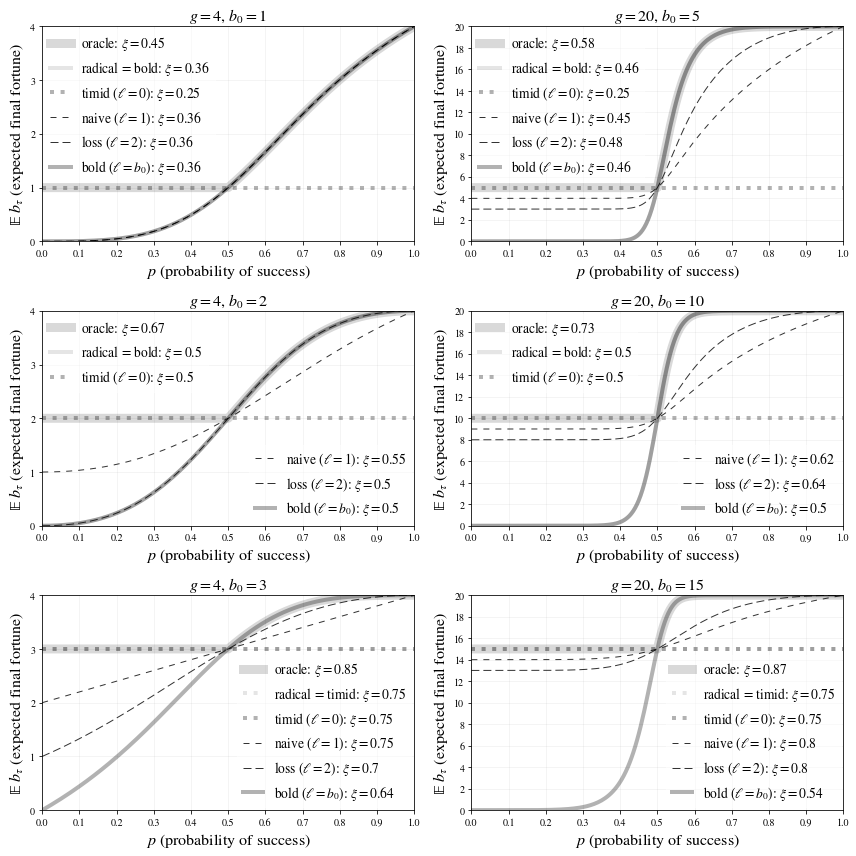

In [ ]:
fig, ax = plt.subplots(arr_b_size, arr_g_size, figsize=(12, 12))

arr_color_idx = ['b', 'r', 'g', 'k', 'y']
arr_color_size = len(arr_color_idx)
arr_line_idx = ['-', '--', ':']
arr_line_size = len(arr_line_idx)

marks = 10

arr_linestyle = [(0, (2, 8)), (0, (4, 6)), (0, (6, 4)), (0, (8, 2)), '-']

markers= ['', 's', 'v', '^', 'o', 'x']

for idx_b in range(arr_b_size):
  for idx_g in range(arr_g_size):
    b0 = arr_b_base[idx_b] * arr_g_factor[idx_g]
    g = g_base * arr_g_factor[idx_g]
    ax[idx_b, idx_g].set_title(f'$g={g}$, $b_0={b0}$', fontsize=16) #b_0={b0/g:.2}g
    ax[idx_b, idx_g].set(xlim=(0, 1), ylim=(f(0,g), f(g,g)))
    u_oracle = str(round(theoretical_oracle_naive_score[idx_b, idx_g]/g,2))
    u_naive = str(round(theoretical_freq_naive_score[idx_b, idx_g]/g,2))
    u_timid = str(round(theoretical_always_quit_score[idx_b, idx_g]/g,2))
    u_bold = str(round(theoretical_always_play_score[idx_b, idx_g]/g,2))
    u_losstwo = str(round(theoretical_loss_two_score[idx_b, idx_g]/g,2))
    lbl_oracle = r'oracle: $\xi = ' + u_oracle + '$'
    lbl_naive =  r'naive ($\ell=1$): $\xi = ' + u_naive + '$'
    lbl_timid = r'timid ($\ell=0$): $\xi = ' +  u_timid + '$'
    lbl_bold = r'bold ($\ell=b_0$): $\xi = ' +  u_bold  + '$'
    if idx_b != 2:
      lbl_radical = r'radical = bold: $\xi = ' + u_bold + '$'
    else:
      lbl_radical = r'radical = timid: $\xi = ' + u_timid + '$'
    lbl_losstwo = r'loss ($\ell=2$): $\xi = ' + u_losstwo + '$'

    p_oracle,  = ax[idx_b, idx_g].plot(arr_p, theoretical_oracle_naive[idx_b, idx_g], alpha=0.15, color='k', lw=9, linestyle='-' , label=lbl_oracle )
    if idx_b != 2:
      p_radical, = ax[idx_b, idx_g].plot(arr_p, theoretical_always_play[idx_b, idx_g],  alpha=0.1, color='k', lw=4, linestyle='-', label=lbl_radical )
    else:
      p_radical, = ax[idx_b, idx_g].plot(arr_p, theoretical_always_quit[idx_b, idx_g],  alpha=0.1, color='k', lw=4, linestyle=':', label=lbl_radical )
    p_timid ,  = ax[idx_b, idx_g].plot(arr_p, theoretical_always_quit[idx_b, idx_g],  alpha=0.3, color='k', lw=4, linestyle=':',  label=lbl_timid )
    p_naive ,  = ax[idx_b, idx_g].plot(arr_p, theoretical_freq_naive[idx_b, idx_g],   alpha=0.8, color='k', lw=1, linestyle=(0, (6, 6)),  label=lbl_naive )
    p_losstwo, = ax[idx_b, idx_g].plot(arr_p, theoretical_loss_two[idx_b, idx_g],     alpha=0.8, color='k', lw=1, linestyle=(0, (8, 4)),  label=lbl_losstwo )
    p_bold  ,  = ax[idx_b, idx_g].plot(arr_p, theoretical_always_play[idx_b, idx_g],  alpha=0.3, color='k', lw=4, linestyle='-',  label=lbl_bold )

    ax[idx_b, idx_g].set_xlabel(r"$p \ \mathrm{(probability \ of \ success)}$", fontsize=16)
    ax[idx_b, idx_g].set_ylabel(r'$\mathrm{\mathbb{E}} \ b_{\tau} \ \mathrm{(expected \ final \ fortune)}$', fontsize=16)
    #ax[idx_b, idx_g].set_xlim(xmin=-0.01, xmax=1.01)    
    #ax[idx_b, idx_g].set_ylim(ymin=-0.01, ymax=1.01)    

    ry = range(g+1) if g < 10 else range(0, g+1, 2)
    ax[idx_b, idx_g].set_yticks(ry)
    #ax[idx_b, idx_g].set_yticks([g//2], minor=True)
    #ax[idx_b, idx_g].set_yticks([0.5], minor=True)
    #ax[idx_b, idx_g].set_xticks([0.5], minor=True)
    ax[idx_b, idx_g].set_xticks(np.linspace(0,1,11))
    ax[idx_b, idx_g].grid(color='grey', alpha=0.1, linestyle='solid')

    if (idx_b != 1):
      ax[idx_b, idx_g].legend(loc='best', frameon=True, fontsize=13.5, facecolor='w', framealpha=0.5, borderaxespad=0.2, edgecolor='w')
    else:
      artist1 = ax[idx_b, idx_g].legend(handles=[p_oracle, p_radical, p_timid],  loc='upper left', frameon=True, fontsize=13.5, facecolor='w', framealpha=0.5, borderaxespad=0.2, edgecolor='w')
      artist2 = ax[idx_b, idx_g].legend(handles=[p_naive, p_losstwo, p_bold], loc='lower right', frameon=True, fontsize=13.5, facecolor='w', framealpha=0.5, borderaxespad=0.2, edgecolor='w')
      ax[idx_b, idx_g].add_artist(artist1)

fig.tight_layout()

if save_pics:
  plt.savefig('basic_strategies.pdf', bbox_inches='tight')

plt.show()

#files.download('basic_strategies.pdf')

In [ ]:
%%time

#samples for p
arr_p_size = 11

arr_p = np.linspace(0, 1, arr_p_size)

arr_g_factor = [1, 5] # [1, 2, 3, 4, 5, 10]
arr_g_size = len(arr_g_factor)
g_base = 4

arr_b_base = [1, 2, 3]
arr_b_size = len(arr_b_base)

num_games = 11

########################################
#findings for f = b: [for each p] (in average)

# A = always_quit   [==] our_naive
# B = always_play
# C = oracle_naive  [==] oracle_global
# D = oracle_simple [==] oracle_local
# E = freq_naive    [==] freq_global   [==]   freq_local   [==]  bayes_naive  [==]  bayes_global  [==]  bayes_local  
# F = freq_simple
# G = bayes_simple
# H = our_simple

# A [!=](~~) B

# A [!=](>)  B   :    if b_0 < g/2
# A [!=](==) B   :    if b_0 = g/2
# A [!=](<)  B   :    if b_0 > g/2

# C [>=](>)  D

# E [!=](>=) F [!=](>=) G 

# E [==]     F [==]     G  :  if b_0 >= g/2
# E [!=](>)  F [!=](>)  G  :  if b_0 <  g/2 

# E [!=](>)  A

# E [!=](>=) H

########################################

arr_methods = []
##arr_methods += [always_quit_method]
arr_methods += [always_play_method]
##arr_methods += [oracle_naive_method]
###arr_methods += [oracle_simple_method]
###REMOVED : arr_methods += [oracle_local_method] #equivalent to oracle_simple_method for f=b
###REMOVED : arr_methods += [oracle_global_method] #equivalent to oracle_naive_method for f=b
##arr_methods += [freq_naive_method]
###arr_methods += [freq_simple_method]
###arr_methods += [freq_final_method]
#arr_methods += [beta_method]
#arr_methods += [opportunist_method]
###arr_methods += [bayes_final_method]
###arr_methods += [freq_final_method]
###REMOVED : arr_methods += [freq_local_method, freq_global_method] #equivalent to freq_naive_method for f=b
###arr_methods += [bayes_simple_method]
###REMOVED : arr_methods += [our_naive_method] #equivalent to always_quit_method for f=b
###REMOVED : arr_methods += [our_local_method] #no sense method
###arr_methods += [our_global_method]
###REMOVED : arr_methods += [bayes_naive_method, bayes_local_method, bayes_global_method] #equivalent to freq_naive_method for f=b

num_methods = len(arr_methods)

final_b = np.zeros((arr_b_size, arr_g_size, num_methods, arr_p_size))
final_f = np.zeros((arr_b_size, arr_g_size, num_methods, arr_p_size))
final_n = np.zeros((arr_b_size, arr_g_size, num_methods, arr_p_size))

theoretical_always_quit = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_always_play = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_play_quit = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_oracle_naive = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_freq_naive = np.zeros((arr_b_size, arr_g_size, arr_p_size))
theoretical_always_quit_score = np.zeros((arr_b_size, arr_g_size))
theoretical_always_play_score = np.zeros((arr_b_size, arr_g_size))
theoretical_play_quit_score = np.zeros((arr_b_size, arr_g_size))
theoretical_oracle_naive_score = np.zeros((arr_b_size, arr_g_size))
theoretical_freq_naive_score = np.zeros((arr_b_size, arr_g_size))

#f = lambda b, g : b
f = lambda b, g : b/g
#f = lambda b, g : 0 if b==0 else (+1 if b==g else 0.5)

arr_x_size = 1000
max_duration = 2000

#theoretical
for idx_g in range(arr_g_size): 
  g = g_base * arr_g_factor[idx_g]
  for idx_b in range(arr_b_size): 
    b0 = arr_b_base[idx_b] * arr_g_factor[idx_g]
    theoretical_always_quit[idx_b, idx_g] = np.repeat(f(b0,g), arr_p_size)
    theoretical_always_quit_score[idx_b, idx_g] = f(b0,g)
    theoretical_always_play[idx_b, idx_g] = np.array([f(win_prob(p, b0, g) * g, g) for p in arr_p]) 
    theoretical_always_play_score[idx_b, idx_g] = f(win_area(b0, g) * g, g)
    theoretical_play_quit[idx_b, idx_g] = np.array([f(win_prob(p, b0, g) * g, g) for p in arr_p])  if b0 < g/2 else  np.repeat(f(b0,g), arr_p_size)
    theoretical_play_quit_score[idx_b, idx_g] = f(win_area(b0, g) * g, g)  if b0 < g/2 else  f(b0,g)
    theoretical_oracle_naive[idx_b, idx_g] = np.array([f(win_prob(p, b0, g) * g if p > 0.5 else b0, g) for p in arr_p]) 
    theoretical_oracle_naive_score[idx_b, idx_g] = f((b0*0.5)+(win_cumu(1, b0, g, 0.5) * g), g)
    theoretical_freq_naive[idx_b, idx_g] = np.array([f( (win_prob(p, 1, g-b0+1) * g) + ((1-win_prob(p, 1, g-b0+1)) * (b0-1)), g) for p in arr_p]) 
    theoretical_freq_naive_score[idx_b, idx_g] = f((win_area(1, g-b0+1) * g) + ( (1-win_area(1, g-b0+1)) * (b0-1)), g)

#simulation
for idx_game in tqdm(range(num_games), desc='repetitions', leave=True):
#for idx_game in range(num_games):
  arr_rnd = np.random.rand(arr_x_size)
  #arr_x = np.random.binomial(1, p, size=arr_x_size)
  #for idx_p in tqdm(range(arr_p_size), desc='varying success parameter', leave=True): 
  for idx_p in range(arr_p_size): 
    p = arr_p[idx_p]
    arr_x = np.less(arr_rnd, p)
    #for idx_g in tqdm(range(arr_g_size), desc='varying total fortune', leave=False): 
    for idx_g in range(arr_g_size): 
      g = g_base * arr_g_factor[idx_g]
      #for idx_b in tqdm(range(arr_b_size), desc='varying initial budget', leave=False): 
      for idx_b in range(arr_b_size): 
        b0 = arr_b_base[idx_b] * arr_g_factor[idx_g]
        for idx_method in range(num_methods): 
          method = arr_methods[idx_method]
          b = b0
          k = 0
          z = 0
          n = 0
          while method(b, g, k, z, p, f) and b>0 and b<g and ((max_duration is None) or (n < max_duration)) :
            x = arr_x[n % arr_x_size]
            r = 2*x-1
            b = b+r
            k = k+x
            n = n+1
            z = n-k
          final_b[idx_b, idx_g, idx_method, idx_p] = final_b[idx_b, idx_g, idx_method, idx_p] + (b / num_games)
          final_f[idx_b, idx_g, idx_method, idx_p] = final_f[idx_b, idx_g, idx_method, idx_p] + (f(b, g) / num_games)
          final_n[idx_b, idx_g, idx_method, idx_p] = final_n[idx_b, idx_g, idx_method, idx_p] + (n / num_games)

average_b = np.mean(final_b, axis=3)
average_f = np.mean(final_f, axis=3)
average_n = np.mean(final_n, axis=3)

#print(final_b)
#print(final_n)



CPU times: user 112 ms, sys: 4.95 ms, total: 117 ms
Wall time: 128 ms


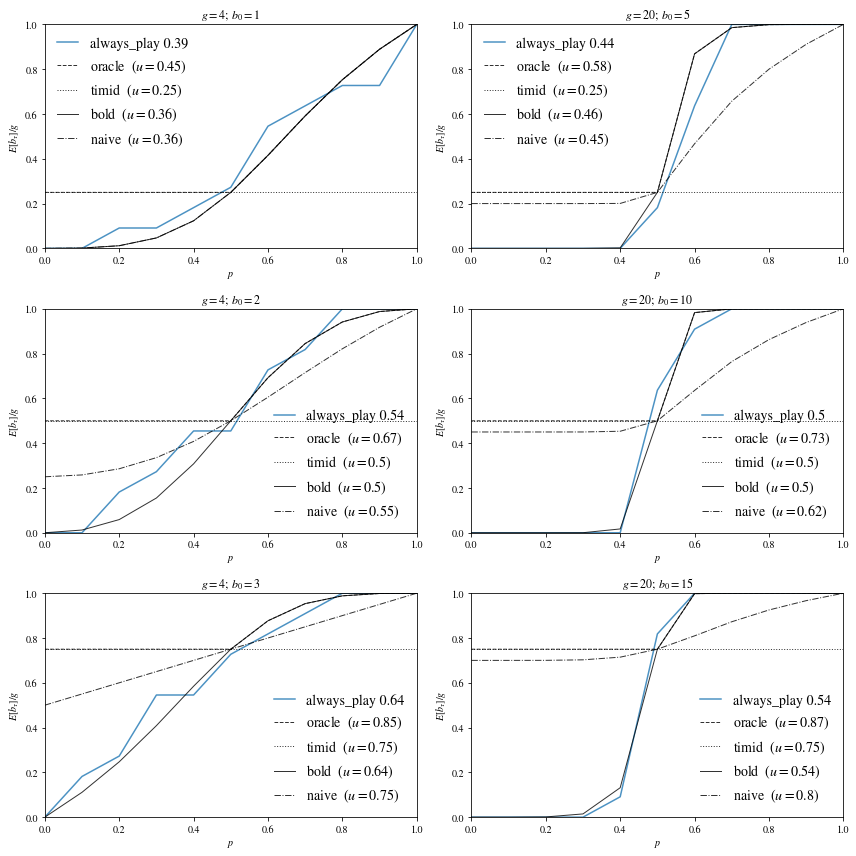

In [ ]:
fig, ax = plt.subplots(arr_b_size, arr_g_size, figsize=(12, 12))

#arr_color_idx = plt.cm.plasma(np.linspace(0, 1, num_methods))
#arr_color_idx = plt.cm.brg(np.linspace(0, 1, num_methods))
arr_color_idx = ['b', 'r', 'g', 'k', 'y']
arr_color_size = len(arr_color_idx)
arr_line_idx = ['-', '--', ':']
arr_line_size = len(arr_line_idx)

marks = 1

for idx_b in range(arr_b_size):
  for idx_g in range(arr_g_size):
    b0 = arr_b_base[idx_b] * arr_g_factor[idx_g]
    g = g_base * arr_g_factor[idx_g]
    ax[idx_b, idx_g].set_title(f'$g={g}$; $b_0={b0}$') #b_0={b0/g:.2}g
    for idx_method in range(num_methods):
      #ax[idx_b, idx_g].plot(arr_p, final_f[idx_b, idx_g, idx_method] , color=arr_color_idx[idx_method%arr_color_size], linestyle=arr_line_idx[idx_method*arr_line_size//num_methods] , lw=idx_method//(num_methods//arr_line_size)*2+2, alpha=0.5, label=arr_methods[idx_method].__name__[:-7])
      ax[idx_b, idx_g].plot(arr_p, final_f[idx_b, idx_g, idx_method] , alpha=0.8, label=arr_methods[idx_method].__name__[:-7] + f' {average_f[idx_b, idx_g, idx_method]:.2}' )
    ax[idx_b, idx_g].set(xlim=(0, 1), ylim=(f(0,g), f(g,g)))
    ax[idx_b, idx_g].plot(arr_p, theoretical_oracle_naive[idx_b, idx_g], alpha=0.8, color='k', lw=1, linestyle='--', marker='', mfc='none', markersize=10, markevery=marks, label='oracle ' + f' ($u = {theoretical_oracle_naive_score[idx_b, idx_g]:.2}$)' )
    ax[idx_b, idx_g].plot(arr_p, theoretical_always_quit[idx_b, idx_g],  alpha=0.8, color='k', lw=1, linestyle=':', marker='', mfc='none', markersize=6,  markevery=marks, label='timid '  + f' ($u = {theoretical_always_quit_score[idx_b, idx_g]:.2}$)' )
    ax[idx_b, idx_g].plot(arr_p, theoretical_always_play[idx_b, idx_g],  alpha=0.8, color='k', lw=1, linestyle='-', marker='', mfc='none', markersize=6,  markevery=marks, label='bold '   + f' ($u = {theoretical_always_play_score[idx_b, idx_g]:.2}$)' )
    ax[idx_b, idx_g].plot(arr_p, theoretical_freq_naive[idx_b, idx_g], alpha=0.8,   color='k', lw=1, linestyle='-.', marker='', mfc='none', markersize=8,  markevery=marks, label='naive '   + f' ($u = {theoretical_freq_naive_score[idx_b, idx_g]:.2}$)' )
    #ax[idx_b, idx_g].plot(arr_p, theoretical_play_quit[idx_b, idx_g], alpha=0.4,   color='r', lw=6, linestyle='',  label='potential' + f' ($u = {theoretical_play_quit_score[idx_b, idx_g]:.2}$)' )
    #if idx_b != 1:
    ax[idx_b, idx_g].legend(loc='best', frameon=False)
    ax[idx_b, idx_g].set_xlabel('$p$')
    ax[idx_b, idx_g].set_ylabel('$E[b_{\\tau}] / g$')
#ax[2][1].set_xlabel('$p$  (probability of success)')
#ax[1][0].set_ylabel('$E[b_\tau] / g$  (epected value of the target optimization function)')

#fig.suptitle('Number of possible paths from a given initial budget to achieve another budget level.')
fig.tight_layout()

if save_pics:
  plt.savefig('basic_strategies.pdf', bbox_inches='tight')

plt.show()

#print(arr_p)

In [ ]:
%%time

arr_g_factor = [1, 5] # [1, 2, 3, 4, 5, 10]
arr_g_size = len(arr_g_factor)
g_base = 4
g_lcm = np.lcm.reduce(arr_g_factor)

#samples for ratio : b0/g
ratio_factor = 10
arr_ratio_size = g_lcm * g_base * ratio_factor + 1
arr_ratio = np.linspace(0, 1, arr_ratio_size)

theoretical_always_quit_score = np.zeros((arr_g_size, arr_ratio_size))
theoretical_always_play_score = np.zeros((arr_g_size, arr_ratio_size))
theoretical_play_quit_score = np.zeros((arr_g_size, arr_ratio_size))
theoretical_oracle_naive_score = np.zeros((arr_g_size, arr_ratio_size))
theoretical_freq_naive_score = np.zeros((arr_g_size, arr_ratio_size))
theoretical_loss_2 = np.zeros((arr_g_size, arr_ratio_size))
theoretical_loss_3 = np.zeros((arr_g_size, arr_ratio_size))
theoretical_loss_4 = np.zeros((arr_g_size, arr_ratio_size))

#f = lambda b, g : b
f = lambda b, g : b/g
#f = lambda b, g : 0 if b==0 else (+1 if b==g else 0.5)

#theoretical
for idx_g in range(arr_g_size): 
  g = g_base * arr_g_factor[idx_g]
  for idx_ratio in range(arr_ratio_size): 
    b0 = arr_ratio[idx_ratio] * g
    theoretical_always_quit_score[idx_g, idx_ratio] = f(b0,g)
    theoretical_always_play_score[idx_g, idx_ratio] = f(win_area(b0, g) * g, g)
    theoretical_play_quit_score[idx_g, idx_ratio] = f(win_area(b0, g) * g, g)  if b0 < g/2 else  f(b0,g)
    theoretical_oracle_naive_score[idx_g, idx_ratio] = f((b0*0.5)+(win_cumu(1, b0, g, 0.5) * g), g)
    theoretical_freq_naive_score[idx_g, idx_ratio] = f((win_area(1, g-b0+1) * g) + ( (1-win_area(1, g-b0+1)) * (b0-1)), g)
    l = min(2, b0)
    theoretical_loss_2[idx_g, idx_ratio] = f((win_area(l, g-b0+l) * g) + ( (1-win_area(l, g-b0+l)) * (b0-l)), g)
    l = min(3, b0)
    theoretical_loss_3[idx_g, idx_ratio] = f((win_area(l, g-b0+l) * g) + ( (1-win_area(l, g-b0+l)) * (b0-l)), g)
    l = min(4, b0)
    theoretical_loss_4[idx_g, idx_ratio] = f((win_area(l, g-b0+l) * g) + ( (1-win_area(l, g-b0+l)) * (b0-l)), g)


CPU times: user 674 ms, sys: 5.08 ms, total: 679 ms
Wall time: 674 ms


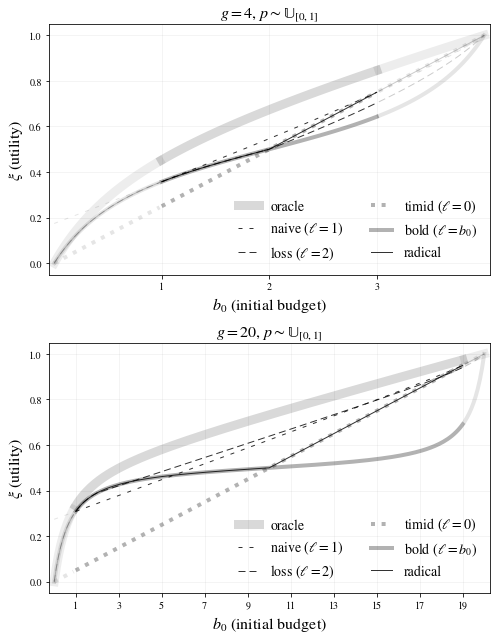

In [ ]:
fig, ax = plt.subplots(arr_g_size, 1, figsize=(7, 9))

for idx_g in range(arr_g_size): 
  g = g_base * arr_g_factor[idx_g]
  first = np.argmax(arr_ratio * g >= 1)
  last  = np.argmax(arr_ratio * g > g-1)
  #marks = None
  marks = np.flatnonzero(arr_ratio * g >= 1)[0] # and np.nozero(arr_ratio * g <= g-1) and np.nozero(arr_ratio // 1 == arr_ratio))[0][0]
  ax[idx_g].set_title(f'$g={g}$' + r', $p\sim\mathrm{\mathbb{U}}_{[0,1]}$', fontsize=16)

  #ax[idx_g].axvline(x=1/g,      color='c', lw=1, linestyle='--')
  #ax[idx_g].axvline(x=(g-1)/g, color='c', lw=1, linestyle='--')

  ax[idx_g].plot(arr_ratio[:first]*g,   theoretical_oracle_naive_score[idx_g][:first],       alpha=0.07, color='k', lw=9, linestyle='-')
  ax[idx_g].plot(arr_ratio[first:last]*g, theoretical_oracle_naive_score[idx_g][first:last], alpha=0.15, color='k', lw=9, linestyle='-', marker='', mfc='w', markersize=7, markevery=marks, label='oracle')      # + f' ($u = {theoretical_oracle_naive_score[idx_b, idx_g]:.2}$)' )
  ax[idx_g].plot(arr_ratio[last:]*g,    theoretical_oracle_naive_score[idx_g][last:],        alpha=0.07, color='k', lw=9, linestyle='-')

  ax[idx_g].plot(arr_ratio[:first]*g,   theoretical_freq_naive_score[idx_g][:first],         alpha=0.1, color='k', lw=1, linestyle=(0, (4, 7)))
  ax[idx_g].plot(arr_ratio[first:last]*g, theoretical_freq_naive_score[idx_g][first:last],   alpha=0.8, color='k', lw=1, linestyle=(0, (4, 7)), marker='',  mfc='w', markersize=6, markevery=marks, label='naive ($\ell=1$)')      # + f' ($u = {theoretical_freq_naive_score[idx_b, idx_g]:.2}$)' )
  ax[idx_g].plot(arr_ratio[last:]*g,    theoretical_freq_naive_score[idx_g][last:],          alpha=0.1, color='k', lw=1, linestyle=(0, (4, 7)))

  ax[idx_g].plot(arr_ratio[:first]*g,   theoretical_loss_2[idx_g][:first],          alpha=0.2, color='k', lw=1, linestyle=(0, (7, 4)))
  ax[idx_g].plot(arr_ratio[first:last]*g, theoretical_loss_2[idx_g][first:last],    alpha=0.8, color='k', lw=1, linestyle=(0, (7, 4)), marker='',  mfc='w',  markersize=6, markevery=marks, label='loss ($\ell=2$)')   # + f' ($u = {theoretical_play_quit_score[idx_b, idx_g]:.2}$)' )
  ax[idx_g].plot(arr_ratio[last:]*g,    theoretical_loss_2[idx_g][last:],           alpha=0.2, color='k', lw=1, linestyle=(0, (7, 4)))

  ax[idx_g].plot(arr_ratio[:first]*g,   theoretical_always_quit_score[idx_g][:first],        alpha=0.1, color='k', lw=4, linestyle=':')
  ax[idx_g].plot(arr_ratio[first:last]*g, theoretical_always_quit_score[idx_g][first:last],  alpha=0.3, color='k', lw=4, linestyle=':', marker='',  mfc='w', markersize=6, markevery=marks, label='timid ($\ell=0$)')      # + f' ($u = {theoretical_always_quit_score[idx_b, idx_g]:.2}$)' )
  ax[idx_g].plot(arr_ratio[last:]*g,    theoretical_always_quit_score[idx_g][last:],         alpha=0.1, color='k', lw=4, linestyle=':')

  ax[idx_g].plot(arr_ratio[:first]*g,   theoretical_always_play_score[idx_g][:first],        alpha=0.1, color='k', lw=4, linestyle='-')
  ax[idx_g].plot(arr_ratio[first:last]*g, theoretical_always_play_score[idx_g][first:last],  alpha=0.3, color='k', lw=4, linestyle='-', marker='',  mfc='w', markersize=6, markevery=marks, label='bold ($\ell=b_0$)')       # + f' ($u = {theoretical_always_play_score[idx_b, idx_g]:.2}$)' )
  ax[idx_g].plot(arr_ratio[last:]*g,    theoretical_always_play_score[idx_g][last:],         alpha=0.1, color='k', lw=4, linestyle='-')

  ax[idx_g].plot(arr_ratio[:first]*g,   theoretical_play_quit_score[idx_g][:first],          alpha=0.2, color='k', lw=1, linestyle='-')
  ax[idx_g].plot(arr_ratio[first:last]*g, theoretical_play_quit_score[idx_g][first:last],    alpha=0.8, color='k', lw=1, linestyle='-', marker='',  mfc='k',  markersize=2, markevery=marks, label='radical')   # + f' ($u = {theoretical_play_quit_score[idx_b, idx_g]:.2}$)' )
  ax[idx_g].plot(arr_ratio[last:]*g,    theoretical_play_quit_score[idx_g][last:],           alpha=0.2, color='k', lw=1, linestyle='-')

  ax[idx_g].legend(loc='best', ncol=2, frameon=False, fontsize=14)
  ax[idx_g].set_xlabel('$b_0 \ \mathrm{(initial \ budget)}$', fontsize=16)
  #ax[idx_g].set_ylabel('$\int E[b_\\tau] / g$')
  #ax[idx_g].set_ylabel(r'$\xi_\pi = \int \mathrm{\mathbb{E}}b_\tau / g$', fontsize=18)
  ax[idx_g].set_ylabel(r'$\xi \ \mathrm{(utility)}$', fontsize=16)
  #ax[idx_g].set_yticks([0.5], minor=True)
  #ax[idx_g].set_xticks([0.5], minor=True)
  r = range(1, g) if g < 15 else range(1, g, 2)
  ax[idx_g].set_xticks(r)
  ax[idx_g].grid(color='grey', alpha=0.1, linestyle='solid')

  ax[idx_g].set_xlim(-g/80, g+g/80)

#fig.suptitle('Number of possible paths from a given initial budget to achieve another budget level.')
fig.tight_layout()

if save_pics:
  plt.savefig('basic_strategies_utilities.pdf', bbox_inches='tight')

plt.show()

#files.download('basic_strategies_utilities.pdf')


In [ ]:
import pandas as pd
from IPython.display import display

min_g = 2
max_g = 31
arr_g = range(min_g, max_g)
arr_g_size = len(arr_g)

theoretical_loss_score = np.zeros((arr_g_size, arr_g_size, max_g))
best_loss = np.zeros((arr_g_size, arr_g_size), dtype='int')

#f = lambda b, g : b
f = lambda b, g : b/g
#f = lambda b, g : 0 if b==0 else (+1 if b==g else 0.5)

#theoretical
for idx_g, g in enumerate(arr_g): 
  for idx_b_0, b_0 in enumerate(range(1, g)):
    for idx_loss, l in enumerate(range(0, b_0+1)):
      theoretical_loss_score[idx_g, idx_b_0, idx_loss] = f((win_area(l, g-b_0+l) * g) + ( (1-win_area(l, g-b_0+l)) * (b_0-l)), g)
    #best_loss[idx_g, idx_b_0] = np.argmax(theoretical_loss_score[idx_g, idx_b_0])
    best_loss[idx_g, idx_b_0] = np.argwhere(theoretical_loss_score[idx_g, idx_b_0] == np.amax(theoretical_loss_score[idx_g, idx_b_0]))[-1]

print(r'g \ b_0')
#np.flatnonzero(a == np.max(a))[-1]
#i = len(a)-np.argmax(a[::-1])-1
#best_loss = np.argmax(theoretical_loss_score, axis=2)
#best_loss = np.argwhere(theoretical_loss_score == np.amax(listy))

df = pd.DataFrame(best_loss, index=arr_g, columns=range(1,max_g-1))
display(df)

print(df.to_latex())

#for idx_g, g in enumerate(arr_g): 
#  print(f'g = {g}')
#  print(r'b_0 \ l')
#  display(pd.DataFrame(theoretical_loss_score[idx_g][::-1][::-1], index=range(1, arr_g_size+1) , columns=range(0, max_g)))


g \ b_0


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,2,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &  1 &  2 &  3 &  4 &  5 &  6 &  7 &  8 &  9 &  10 &  11 &  12 &  13 &  14 &  15 &  16 &  17 &  18 &  19 &  20 &  21 &  22 &  23 &  24 &  25 &  26 &  27 &  28 &  29 \\
\midrule
2  &  1 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\
3  &  1 &  1 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\
4  &  1 &  1 &  1 &  0 &  0 &  0 &  0 &  0 &  0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\
5  &  1 &  1 &  1 &  1 &  0 &  0 &  0 &  0 &  0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\
6  &  1 &  1 &  1 &  1 &  1 &  0 &  0 &  0 &  0 &   0 &   0 &   0 &   0 &   0 &

In [ ]:
from math import sqrt

min_g = 2
max_g = 31
arr_g = range(min_g, max_g)
arr_g_size = len(arr_g)

best_loss_calc = np.zeros((arr_g_size, arr_g_size), dtype='int')

#theoretical
for idx_g, g in enumerate(arr_g): 
  for idx_b_0, b_0 in enumerate(range(1, g)):
    #v = (sqrt(2*(g-1-b_0))-1)//2+1
    v = (sqrt(2*g-2*b_0-1)-1)//2+1
    best_loss_calc[idx_g, idx_b_0] = max(1,min(b_0, v))

print(r'g \ b_0')

df = pd.DataFrame(best_loss_calc, index=arr_g, columns=range(1,max_g-1))
display(df)

print()

df = pd.DataFrame(best_loss - best_loss_calc, index=arr_g, columns=range(1,max_g-1))
display(df)


g \ b_0


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,2,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,2,2,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,2,2,2,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[1.1366124]
[1.08773525]
[1.03111893]


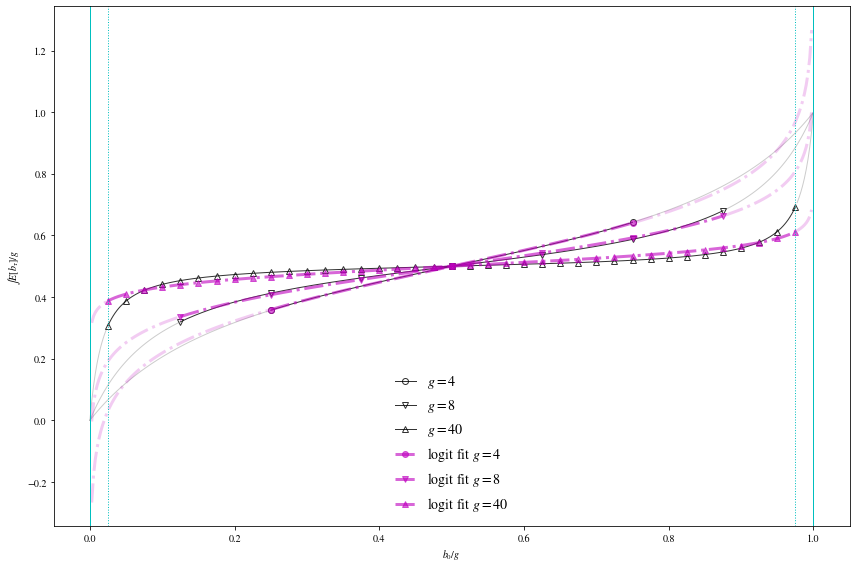

CPU times: user 1.14 s, sys: 209 ms, total: 1.35 s
Wall time: 1.14 s


In [ ]:
%%time

arr_g_factor = [1, 2, 10] # [1, 2, 3, 4, 5, 10]
arr_g_size = len(arr_g_factor)
g_base = 4
g_lcm = np.lcm.reduce(arr_g_factor)

#samples for ratio : b0/g
ratio_factor = 10
arr_ratio_size = g_lcm * g_base * ratio_factor + 1
arr_ratio = np.linspace(0, 1, arr_ratio_size)

area = np.zeros((arr_g_size, arr_ratio_size))

#f = lambda b, g : b
f = lambda b, g : b/g
#f = lambda b, g : 0 if b==0 else (+1 if b==g else 0.5)

#integral of the probability of win on p
for idx_g in range(arr_g_size): 
  g = g_base * arr_g_factor[idx_g]
  for idx_ratio in range(arr_ratio_size): 
    b0 = arr_ratio[idx_ratio] * g
    area[idx_g, idx_ratio] = f(win_area(b0, g) * g, g)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

arr_markers = ['o', 'v', '^', '|', 's', '.']

for idx_g in range(arr_g_size): 
  g = g_base * arr_g_factor[idx_g]
  first = np.argmax(arr_ratio * g >= 1)
  last  = np.argmax(arr_ratio * g > g-1)
  marks = np.flatnonzero(arr_ratio * g >= 1)[0]
  ax.plot(arr_ratio[:first],   area[idx_g][:first],       alpha=0.2, color='k', lw=1, linestyle='-')
  ax.plot(arr_ratio[first:last], area[idx_g][first:last], alpha=0.8, color='k', lw=1, linestyle='-', marker=arr_markers[idx_g], mfc='none', markevery=marks, label=f'$g={g}$' )
  ax.plot(arr_ratio[last:],    area[idx_g][last:],        alpha=0.2, color='k', lw=1, linestyle='-')

from scipy.special import logit
#modlogit = lambda x, x_factor, x_dec, y_factor, y_dec : logit(x * x_factor + x_dec) * y_factor + y_dec
#flogit = lambda x, a : np.log(x/(1.0-x))*np.log(a)+0.5
flogit = lambda x, a : logit(x)*np.log(a)+0.5
#def flogit(x, a):
#  return 0.5 + (np.log(a)*logit(x))

#fflogit = lambda x, a, b : np.log( (b*x - (b-1.0)/2.0) / (1.0 - (b*x - (b-1.0)/2.0)) ) * np.log(a) + 0.5 


#ax.plot(arr_ratio, modlogit(arr_ratio, 0.98, 0.01, 0.11, 0.5), label='modified logit')
#ax.plot(arr_ratio, logit(arr_ratio*0.98+0.01)/9+0.5, label='modified logit')

#logit_a = lambda x : np.log10(x/(1-x))+0.5
#ax.plot(arr_ratio, logit_a(arr_ratio), label='logit base 10')

#logit_b = lambda x : np.log(x/(1-x))+0.5
#ax.plot(arr_ratio, logit_b(arr_ratio), label='logit base e')

#logit_c = lambda x : np.log2(x/(1-x))+0.5
#ax.plot(arr_ratio, logit_c(arr_ratio), label='logit base 2')

from scipy.special import betainc
fbetainc = lambda x, a : betainc(a, a, x)
#ax.plot(arr_ratio, betainc(0.4, 0.4, arr_ratio), label='betainc 0.4 0.4')
#ax.plot(arr_ratio, area[0] - betainc(0.4, 0.4, arr_ratio), label='dif betainc')
#ax.plot(arr_ratio, area[0] - (logit(arr_ratio*0.98+0.01)/9+0.5), label='dif logit')

from scipy.optimize import curve_fit


for idx_g in range(arr_g_size): 
  
  g = g_base * arr_g_factor[idx_g]
  
  first = np.argmax(arr_ratio * g >= 1)
  last  = np.argmax(arr_ratio * g > g-1)
  marks = np.flatnonzero(arr_ratio * g >= 1)[0]
  
#  popt, pcov = curve_fit(fbetainc, arr_ratio[first:last], area[idx_g][first:last])
#  y = fbetainc(arr_ratio, popt[0])
#  ax.plot(arr_ratio[:first],   y[:first],       alpha=0.2, color='g', lw=2, linestyle='--')
#  ax.plot(arr_ratio[first:last], y[first:last], alpha=0.6, color='g', lw=2, linestyle='--', marker=arr_markers[idx_g], markevery=marks, label=f'beta inc fit $g={g}$' )
#  ax.plot(arr_ratio[last:],    y[last:],        alpha=0.2, color='g', lw=2, linestyle='--')

#  z = np.polyfit(arr_ratio[first:last], area[idx_g][first:last], 3)
#  f = np.poly1d(z)
#  y = f(arr_ratio)
#  ax.plot(arr_ratio[:first],   y[:first],       alpha=0.2, color='b', lw=3, linestyle='-.')
#  ax.plot(arr_ratio[first:last], y[first:last], alpha=0.6, color='b', lw=3, linestyle='-.', marker=arr_markers[idx_g], markevery=marks, label=f'poly 3 fit $g={g}$' )
#  ax.plot(arr_ratio[last:],    y[last:],        alpha=0.2, color='b', lw=3, linestyle='-.')

#  z = np.polyfit(arr_ratio[first:last], area[idx_g][first:last], 7)
#  f = np.poly1d(z)
#  y = f(arr_ratio)
#  ax.plot(arr_ratio[:first],   y[:first],       alpha=0.2, color='b', lw=3, linestyle='-.')
#  ax.plot(arr_ratio[first:last], y[first:last], alpha=0.6, color='b', lw=3, linestyle='-.', marker=arr_markers[idx_g], markevery=marks, label=f'poly 7 fit $g={g}$' )
#  ax.plot(arr_ratio[last:],    y[last:],        alpha=0.2, color='b', lw=3, linestyle='-.')

  #popt, pcov = curve_fit(flogit, arr_ratio[first:last], area[idx_g][first:last], p0=1.1, bounds=(1.0001, 100.0))
  popt, pcov = curve_fit(flogit, arr_ratio[first:last], area[idx_g][first:last])
  print(popt)
  y = flogit(arr_ratio, *popt)
  ax.plot(arr_ratio[:first],   y[:first],       alpha=0.2, color='m', lw=3, linestyle='-.')
  ax.plot(arr_ratio[first:last], y[first:last], alpha=0.6, color='m', lw=3, linestyle='-.', marker=arr_markers[idx_g], markevery=marks, label=f'logit fit $g={g}$' )
  ax.plot(arr_ratio[last:],    y[last:],        alpha=0.2, color='m', lw=3, linestyle='-.')


ax.legend(loc='best', frameon=False)
ax.set_xlabel('$b_0/g$')
ax.set_ylabel('$\int E[b_\\tau] / g$')
ax.axvline(x=1/g,     color='c', lw=1, linestyle=':')
ax.axvline(x=(g-1)/g, color='c', lw=1, linestyle=':')
ax.axvline(x=0, color='c', lw=1, linestyle='-')
ax.axvline(x=1, color='c', lw=1, linestyle='-')

fig.tight_layout()

if save_pics:
  plt.savefig('approx.pdf', bbox_inches='tight')

plt.show()

In [ ]:
t_max = 12
g = 9

graphs = [nx.DiGraph() for k in range(g-1)]
pos = [{} for k in range(g-1)]

for k, b_0 in enumerate(tqdm(range(1, g))):

  for t in range(t_max+1):
    for b in range(max(0, b_0-t), min(g+1, b_0+t+1)):
      if ((t+b)%2==b_0%2):

        graphs[k].add_node(f'({t},{b})', pos=(t,b), label='x')

        pos[k][f'({t},{b})'] = (t,b)
        node = f'({t},{b})'

        up = ((t - (b - b_0)) // 2) + (b - b_0)
        dw = t - up
        p_hat = (up+1)/(t+2)
        p_bar = up/t  if  t>0  else  0.5
        
        if (b==g):
          pi = f'$\\bigstar$'
        elif (b==0):
          pi = f'$\\boxtimes$' #f'$\\times$' #f'$\\dagger$' #f'$\\ddag$
        elif (p_hat >= 0.5):
          pi = f'$\\top$'
        else:
          pi = f'$\\bot$'

        graphs[k].nodes[node]['up_steps'] = up
        graphs[k].nodes[node]['dw_steps'] = dw
        graphs[k].nodes[node]['p_hat'] = round(p_hat,2)
        graphs[k].nodes[node]['p_bar'] = round(p_bar,2)
        graphs[k].nodes[node]['policy'] = pi
        #graphs[k].nodes[node]['beta_P'] = round(win_beta_area(graphs[k].nodes[node]['up_steps'], graphs[k].nodes[node]['dw_steps'], b, g) , 2)
        #graphs[k].nodes[node]['beta_E'] = round(graphs[k].nodes[node]['beta_P'] * g , 2)
        #graphs[k].nodes[node]['beta_policy'] = f'$\\top$' if graphs[k].nodes[node]['beta_E'] >= b else f'$\\bot$'

        pred = f'({t-1},{b-1})'
        if (t > 0) and (b > 1) and (b > b_0-t):
          if graphs[k].nodes[pred]['policy'] == f'$\\top$':
            graphs[k].add_edge(pred, node, weight=1, style='dashdot')
        pred = f'({t-1},{b+1})'
        if (t > 0) and (b < g-1) and (b < b_0+t):
          if graphs[k].nodes[pred]['policy'] == f'$\\top$':
            graphs[k].add_edge(pred, node, weight=1, style='dashed')


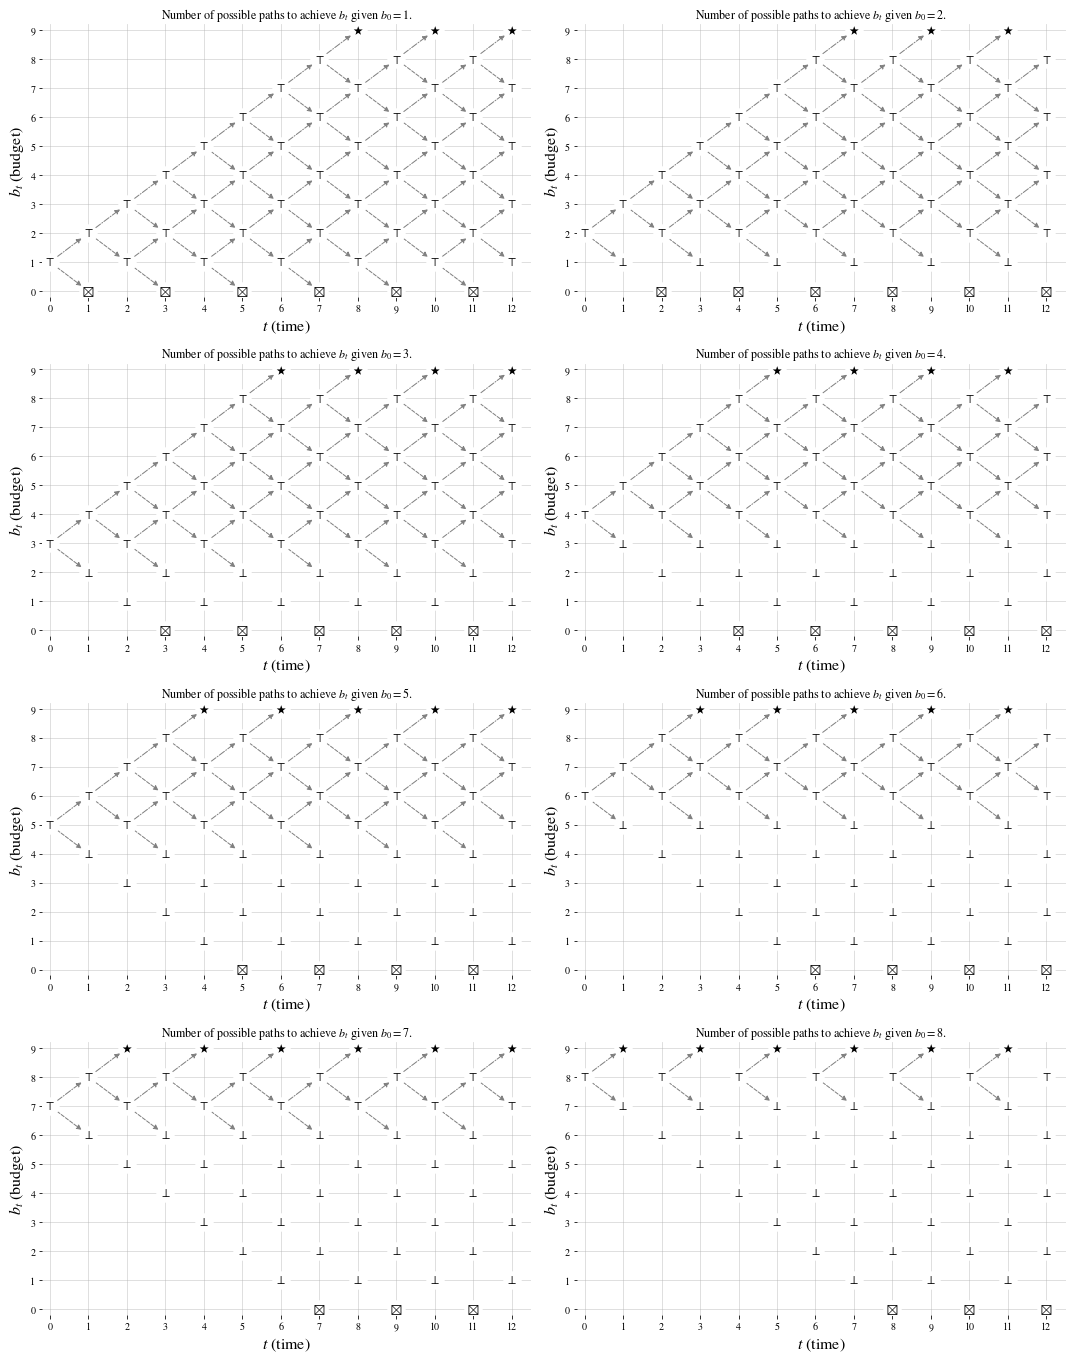

In [ ]:
fig, ax = plt.subplots(g//2, 2, figsize=(15,19))

for k, b_0 in enumerate(tqdm(range(1, g))):

  k_y = k%2
  k_x = k//2

  # define node labels
  labels={}
  node = f'({0},{b_0})'
  labels[node] = '0'
  for t in range(t_max+1):
    for b in range(max(0, b_0-t), min(g+1, b_0+t+1)):
      if ((t+b)%2==b_0%2):
        node = f'({t},{b})'
        labels[node] = f'{graphs[k].nodes[node]["policy"]}'

  edges = graphs[k].edges()
  #colors = [graphs[k][u][v]['color'] for u,v in edges]
  weights = [graphs[k][u][v]['weight'] for u,v in edges]
  styles = [graphs[k][u][v]['style'] for u,v in edges]

  nx.draw_networkx_nodes(graphs[k], pos[k], labels, node_color='w', ax=ax[k_x][k_y])
  nx.draw_networkx_labels(graphs[k], pos[k], labels, ax=ax[k_x][k_y]) #font_size=16
  drawn_edges = nx.draw_networkx_edges(graphs[k], pos[k], width=weights, edge_color='gray', ax=ax[k_x][k_y])  #edge_color=colors,
  for edge, style in zip(drawn_edges, styles):
    edge.set_linestyle(style)

  ax[k_x][k_y].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

  ax[k_x][k_y].set_xticks(range(0, t_max+1))
  ax[k_x][k_y].set_yticks(range(0, g+1))

  ax[k_x][k_y].set_xlim(-0.2, t_max+0.5)
  ax[k_x][k_y].set_ylim(-0.2, g+0.2)

  ax[k_x][k_y].spines['top'].set_visible(False)
  ax[k_x][k_y].spines['right'].set_visible(False)
  ax[k_x][k_y].spines['bottom'].set_visible(False)
  ax[k_x][k_y].spines['left'].set_visible(False)

  #ax[k_x][k_y].grid(which='both')
  #ax[k_x][k_y].grid(which='minor', alpha=0.2)
  ax[k_x][k_y].grid(which='major', alpha=0.5)

  ax[k_x][k_y].set_xlabel(r'$t \ \mathrm{(time)}$', fontsize=16)
  ax[k_x][k_y].set_ylabel(r'$b_t \ \mathrm{(budget)}$', fontsize=16)
  ax[k_x][k_y].set_title(f'Number of possible paths to achieve $b_t$ given $b_0 = {b_0}$.')

#fig.suptitle('Number of possible paths from a given initial budget to achieve another budget level.')
fig.tight_layout()

if save_pics:
  plt.savefig('combinations.pdf', bbox_inches='tight')

plt.show()

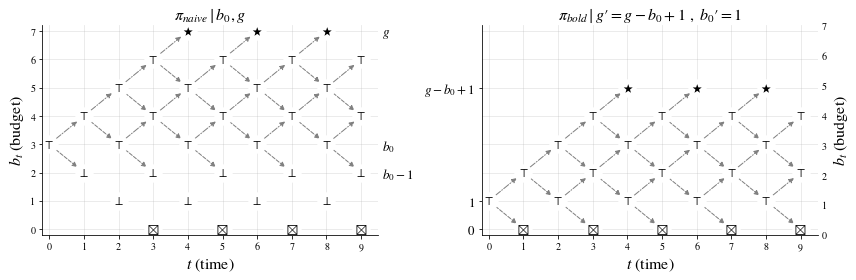

In [ ]:
t_max = 9
g_base = 7
b_0_base = 3

graphs = [nx.DiGraph() for k in range(2)]
pos = [{} for k in range(2)]
labels=[{} for k in range(2)]

for k in range(2):

  if k==0 :
    g  = g_base
    b_0 = b_0_base
  else :
    g  = g_base - b_0_base + 1
    b_0 = 1

  for t in range(t_max+1):
    for b in range(max(0, b_0-t), min(g+1, b_0+t+1)):
      if ((t+b)%2==b_0%2):

        graphs[k].add_node(f'({t},{b})', pos=(t,b), label='x')

        pos[k][f'({t},{b})'] = (t,b)
        node = f'({t},{b})'

        if (b==g):
          pi = f'$\\bigstar$'
        elif (b==0):
          pi = f'$\\boxtimes$' #f'$\\times$' #f'$\\dagger$' #f'$\\ddag$
        elif (b >= b_0):
          pi = f'$\\top$'
        else:
          pi = f'$\\bot$'

        graphs[k].nodes[node]['label'] = pi
        labels[k][node] = pi

        pred = f'({t-1},{b-1})'
        if (t > 0) and (b > 1) and (b > b_0-t):
          if graphs[k].nodes[pred]['label'] == f'$\\top$':
            graphs[k].add_edge(pred, node, color='k', weight=1, style='dashdot')
        pred = f'({t-1},{b+1})'
        if (t > 0) and (b < g-1) and (b < b_0+t):
          if graphs[k].nodes[pred]['label'] == f'$\\top$':
            graphs[k].add_edge(pred, node, weight=1, style='dashed')

fig, ax = plt.subplots(1, 2, figsize=(12,4))

for k in range(2):

  edges = graphs[k].edges()
  weights = [graphs[k][u][v]['weight'] for u,v in edges]
  styles = [graphs[k][u][v]['style'] for u,v in edges]

  nx.draw_networkx_nodes(graphs[k], pos[k], labels[k], node_color='w', ax=ax[k])
  nx.draw_networkx_labels(graphs[k], pos[k], labels[k], ax=ax[k]) #font_size=16
  drawn_edges = nx.draw_networkx_edges(graphs[k], pos[k], width=weights, edge_color='gray', ax=ax[k])
  for edge, style in zip(drawn_edges, styles):
    edge.set_linestyle(style)

  ax[k].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

  ax[k].set_xticks(range(0, t_max+1))

  ax[k].set_xlim(-0.2, t_max+0.5)
  ax[k].set_ylim(-0.2, g_base+0.2)

  ax[k].spines['top'].set_visible(False)
  ax[k].spines['right'].set_visible(False)
  ax[k].spines['bottom'].set_visible(False)
  ax[k].spines['left'].set_visible(False)

  ax[k].grid(which='both', alpha=0.3)

  ax[k].set_xlabel(r'$t \ \mathrm{(time)}$', fontsize=16)

ax[0].set_title(r'$\pi_\mathit{naive} \mid b_0, g$', fontsize=16)
#ax[0].set_title(r'$\pi_\mathit{naive}(b_0, g)$', fontsize=16)
ax[0].set_ylabel(r'$b_t \ \mathrm{(budget)}$', fontsize=16)

ax[0].set_yticks(range(0, g_base+1))

axr = ax[0].twinx()  # instantiate a second axes that shares the same x-axis
axr.set_yticks([b_0_base-1, b_0_base, g_base])
ax_labels=['$b_0-1$', '$b_0$', '$g$']
axr.tick_params(which='both', length=0, color='w')
axr.set_yticklabels(ax_labels, fontsize=13)
axr.set_ylim(-0.2, g_base+0.2)

for pos in ['top', 'right']: #, 'bottom', 'left']:
  axr.spines[pos].set_visible(False)

ax[1].set_title(r'$\pi_\mathit{bold} \mid g\prime = g - b_0 + 1 \ , \ b_0\prime = 1$', fontsize=16)

axr = ax[1].twinx()  # instantiate a second axes that shares the same x-axis
axr.set_yticks(range(0, g_base+1))
axr.set_ylabel(r'$b_t \ \mathrm{(budget)}$', fontsize=16)
axr.tick_params(which='both', length=0, color='w')
ax[1].set_yticks([0, 1, g_base - b_0_base + 1])
ax[1].set_yticks(range(0, g_base+1), minor=True)
ax[1].tick_params(which='minor', length=0, color='w')
ax[1].set_ylim(-0.2, g_base+0.2)
ax_labels=['$0$', '$1$', '$g - b_0 + 1$']
ax[1].set_yticklabels(ax_labels, fontsize=13)

for pos in ['top', 'right']: #, 'bottom', 'left']:
  axr.spines[pos].set_visible(False)

#axr = ax[1].twinx()  # instantiate a second axes that shares the same x-axis
#axr.set_yticks(range(0, g_base+1))
#axr.set_ylim(-0.2, g_base+0.2)
#axr_labels=[''] * (g_base+1)
#axr.set_yticklabels(axr_labels, fontsize=13)

#plt.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()

if save_pics:
  plt.savefig('naive_bold_transf.pdf', bbox_inches='tight')

plt.show()

#files.download('naive_bold_transf.pdf')


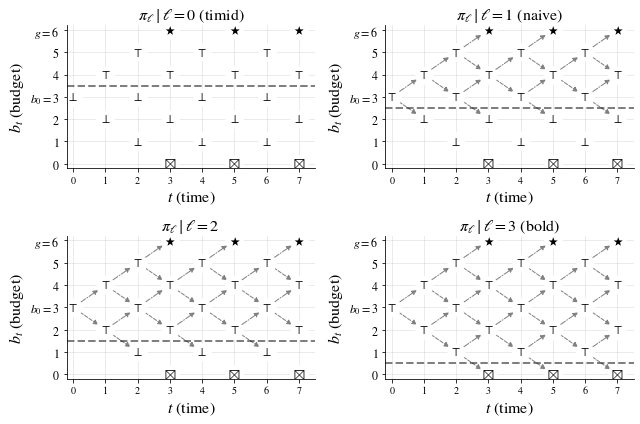

In [ ]:
t_max = 7
g = 6
b_0 = 3
k_arr = range(b_0+1)

graphs = [nx.DiGraph() for k in k_arr]
pos = [{} for k in k_arr]
labels=[{} for k in k_arr]

for k in k_arr:

  i = k//2
  j = k%2
  
  for t in range(t_max+1):
    for b in range(max(0, b_0-t), min(g+1, b_0+t+1)):
      if ((t+b)%2==b_0%2):

        graphs[k].add_node(f'({t},{b})', pos=(t,b))

        pos[k][f'({t},{b})'] = (t,b)
        node = f'({t},{b})'

        if (b==g):
          pi = f'$\\bigstar$'
        elif (b==0):
          pi = f'$\\boxtimes$' #f'$\\times$' #f'$\\dagger$' #f'$\\ddag$
        elif (b > b_0-k):
          pi = f'$\\top$'
        else:
          pi = f'$\\bot$'

        graphs[k].nodes[node]['label'] = pi
        labels[k][node] = pi

        pred = f'({t-1},{b-1})'
        if (t > 0) and (b > 1) and (b > b_0-t) and (k > 0):
          if graphs[k].nodes[pred]['label'] == f'$\\top$':
            graphs[k].add_edge(pred, node, color='k', weight=1, style='dashdot')
        pred = f'({t-1},{b+1})'
        if (t > 0) and (b < g-1) and (b < b_0+t) and (k > 0):
          if graphs[k].nodes[pred]['label'] == f'$\\top$':
            graphs[k].add_edge(pred, node, weight=1, style='dashed')

fig, ax = plt.subplots(2, 2, figsize=(9,6))

extra_labels=['(timid)', '(naive)', '', '(bold)']

for k in k_arr:

  i = k//2
  j = k%2

  edges = graphs[k].edges()
  weights = [graphs[k][u][v]['weight'] for u,v in edges]
  styles = [graphs[k][u][v]['style'] for u,v in edges]

  nx.draw_networkx_nodes(graphs[k], pos[k], labels[k], node_color='w', ax=ax[i][j])
  nx.draw_networkx_labels(graphs[k], pos[k], labels[k], ax=ax[i][j]) #font_size=16
  drawn_edges = nx.draw_networkx_edges(graphs[k], pos[k], width=weights, edge_color='gray', ax=ax[i][j])
  for edge, style in zip(drawn_edges, styles):
    edge.set_linestyle(style)

  ax[i][j].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

  ax[i][j].set_xticks(range(0, t_max+1))

  ax[i][j].set_yticks(range(g+1))
  b_labels = [f'${b}$' for b in range(g+1)]
  b_labels[b_0] = f'$b_0 = {b_0}$'
  b_labels[g] = f'$g = {g}$'
  ax[i][j].set_yticklabels(b_labels, fontsize=12)

  ax[i][j].set_xlim(-0.2, t_max+0.5)
  ax[i][j].set_ylim(-0.2, g+0.2)

  ax[i][j].spines['top'].set_visible(False)
  ax[i][j].spines['right'].set_visible(False)

  ax[i][j].grid(which='both', alpha=0.3)

  ax[i][j].set_xlabel(r'$t \ \mathrm{(time)}$', fontsize=16)
  ax[i][j].set_ylabel(r'$b_t \ \mathrm{(budget)}$', fontsize=16)

  ax[i][j].set_title(f'$\\pi_\\ell \\mid \\ell = {k}$ {extra_labels[k]}' , fontsize=16)

  ax[i][j].axhline(y=b_0-k+0.5, color='k', lw=2, linestyle='--', alpha=0.5)

fig.tight_layout()

if save_pics:
  plt.savefig('max_loss_method.pdf', bbox_inches='tight')

plt.show()

#files.download('max_loss_method.pdf')


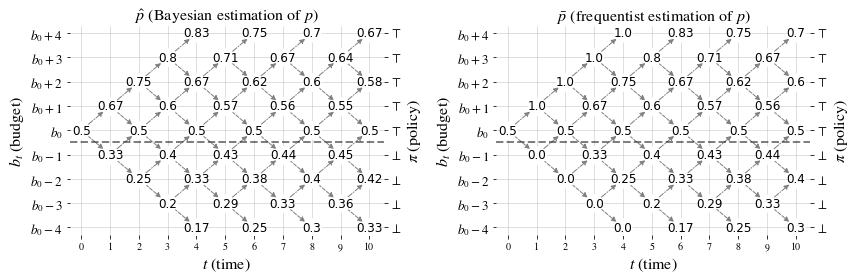

In [ ]:
t_max = 10
g = 8
b_0 = 4

graph = nx.DiGraph()
pos = {}

for t in range(t_max+1):
  for b in range(max(0, b_0-t), min(g+1, b_0+t+1)):
    if ((t+b)%2==b_0%2):

      graph.add_node(f'({t},{b})', pos=(t,b), label='x')

      pos[f'({t},{b})'] = (t,b)
      node = f'({t},{b})'

      up = ((t - (b - b_0)) // 2) + (b - b_0)
      dw = t - up
      p_hat = (up+1)/(t+2)
      p_bar = up/t  if  t>0  else  0.5
      
      graph.nodes[node]['up_steps'] = up
      graph.nodes[node]['dw_steps'] = dw
      graph.nodes[node]['p_hat'] = round(p_hat,2)
      graph.nodes[node]['p_bar'] = round(p_bar,2)

      pred = f'({t-1},{b-1})'
      if (t > 0) and (b > 1) and (b > b_0-t):
        graph.add_edge(pred, node, weight=1, style='dashdot')
      pred = f'({t-1},{b+1})'
      if (t > 0) and (b < g-1) and (b < b_0+t):
        graph.add_edge(pred, node, weight=1, style='dashed')

# define node labels
labels=[{},{}]
labels_bar={}
for t in range(t_max+1):
  for b in range(max(0, b_0-t), min(g+1, b_0+t+1)):
    if ((t+b)%2==b_0%2):
      node = f'({t},{b})'
      labels[0][node] = f'{graph.nodes[node]["p_hat"]}'
      labels[1][node] = f'{graph.nodes[node]["p_bar"]}'

edges = graph.edges()
weights = [graph[u][v]['weight'] for u,v in edges]
styles = [graph[u][v]['style'] for u,v in edges]

fig, ax = plt.subplots(1, 2, figsize=(12,4))

for i in [0, 1]:
  nx.draw_networkx_nodes(graph, pos, labels[i], node_color='w', ax=ax[i])
  nx.draw_networkx_labels(graph, pos, labels[i], ax=ax[i]) #font_size=16
  drawn_edges = nx.draw_networkx_edges(graph, pos, width=weights, edge_color='gray', ax=ax[i])  #edge_color=colors,
  for edge, style in zip(drawn_edges, styles):
    edge.set_linestyle(style)

  ax[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
  ax[i].set_xticks(range(0, t_max+1))
  ax[i].set_yticks(range(0, g+1))
  ax[i].set_xlim(-0.4, t_max+0.5)
  ax[i].set_ylim(-0.3, g+0.3)

  ax_labels=['$b_0-4$', '$b_0-3$', '$b_0-2$', '$b_0-1$', '$b_0$', '$b_0+1$', '$b_0+2$', '$b_0+3$', '$b_0+4$']
  #axr_labels[g//3] = 
  #axr_labels[2*(g//3)] = r'$\top$'
  #axr.set_yticklabels([r'$\bot$','',r'$\top$'])
  ax[i].set_yticklabels(ax_labels, fontsize=13)

  for p in ['top', 'right', 'bottom', 'left']:
    ax[i].spines[p].set_visible(False)

  #ax[i].grid(which='both')
  #ax[i].grid(which='minor', alpha=0.2)
  ax[i].grid(which='major', alpha=0.5)

  ax[i].set_xlabel(r'$t \ \mathrm{(time)}$', fontsize=16)
  ax[i].set_ylabel(r'$b_t \ \mathrm{(budget)}$', fontsize=16)

  ax[i].axhline(y=b_0-0.5, color='k', lw=2, linestyle='--', alpha=0.5)

  axr = ax[i].twinx()  # instantiate a second axes that shares the same x-axis
  axr.set_yticks(range(0, g+1))
  axr.set_ylim(-0.3, g+0.3)
  axr_labels=[r'$\top$' if b >= b_0 else r'$\bot$' for b in range(g+1)]
  #axr_labels[g//3] = 
  #axr_labels[2*(g//3)] = r'$\top$'
  #axr.set_yticklabels([r'$\bot$','',r'$\top$'])
  axr.set_yticklabels(axr_labels, fontsize=13)
  axr.set_ylabel(r'$\pi \ \mathrm{(policy)}$', fontsize=16) 

  for p in ['top', 'right', 'bottom', 'left']:
    axr.spines[p].set_visible(False)

ax[0].set_title(r'$\hat p \ \mathrm{(Bayesian \ estimation \ of \ } p \mathrm{)}$', fontsize=16)
ax[1].set_title(r'$\bar p \ \mathrm{(frequentist \ estimation \ of \ } p \mathrm{)}$', fontsize=16)

fig.tight_layout()

if save_pics:
  plt.savefig('naive_policy.pdf', bbox_inches='tight')

plt.show()

#files.download('naive_policy.pdf')


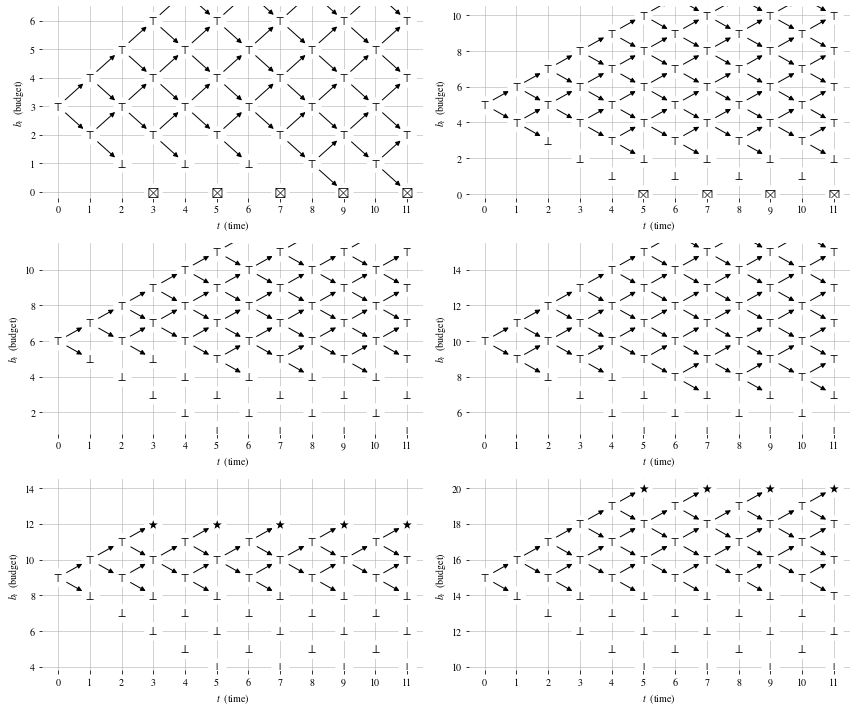

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

fig, ax = plt.subplots(3, 2, figsize=(12,10))

t_max = 11

g_base = 4
g_ratio_arr = [3, 5]
b_0_arr = [1, 2, 3]

for i in range(len(b_0_arr)):
  for j in range(len(g_ratio_arr)):

    b_0 = b_0_arr[i] * g_ratio_arr[j]
    g = g_base * g_ratio_arr[j]

    graph = nx.DiGraph()

    pos = {}
    labels = {}

    for t in range(t_max+1):
      for b in range(max(0, b_0-t), min(g+1, b_0+t+1)):
        if ((t+b)%2==b_0%2):

          graph.add_node(f'({t},{b})', pos=(t,b), label='x')

          pos[f'({t},{b})'] = (t,b)
          node = f'({t},{b})'

          up = ((t - (b - b_0)) // 2) + (b - b_0)
          dw = t - up

          beta_P = win_beta_area(up, dw, b, g)
          #lower bound 
          beta_E = beta_P * g     #  +  (1-beta_P)*(min(b,b_0)-1)

          max_loss=min(3,b_0)
          #beta and max_loss=3
          beta_P = win_beta_area(up, dw, b-b_0+max_loss, g-b_0+max_loss)
          #lower bound 
          beta_E = beta_P * g   +  (1-beta_P)*(b_0-max_loss)

          if (b==g):
            pi = f'$\\bigstar$'
          elif (b==0):
            pi = f'$\\boxtimes$' #f'$\\times$' #f'$\\dagger$' #f'$\\ddag$
          elif (round(beta_E, 5) >= b) and (b>b_0-max_loss):
            pi = f'$\\top$'
          else:
            pi = f'$\\bot$'

          graph.nodes[node]['label'] = pi
          
          labels[node] = pi
          #labels[node] = round(beta_E, 2)

          pred = f'({t-1},{b-1})'
          pred_a = f'({t-2},{b-2})'
          pred_b = f'({t-2},{b})'
          if (t > 0) and (b > 1) and (b > b_0-t):
            if graph.nodes[pred]['label'] == f'$\\top$':
              if (t == 1) or (graph.has_predecessor(pred, pred_a)) or (graph.has_predecessor(pred, pred_b)):
                graph.add_edge(pred, node, color='k', weight=1, style='dashdot')
          pred = f'({t-1},{b+1})'
          pred_a = f'({t-2},{b+2})'
          pred_b = f'({t-2},{b})'
          if (t > 0) and (b < g-1) and (b < b_0+t):
            if graph.nodes[pred]['label'] == f'$\\top$':
              if (t == 1) or (graph.has_predecessor(pred, pred_a)) or (graph.has_predecessor(pred, pred_b)):
                graph.add_edge(pred, node, weight=1, style='dashed')

    nx.draw_networkx_nodes(graph, pos, labels, node_color='w', ax=ax[i][j])
    nx.draw_networkx_edges(graph, pos, width=weights, ax=ax[i][j])
    nx.draw_networkx_labels(graph, pos, labels, ax=ax[i][j]) #font_size=16
    ax[i][j].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax[i][j].set_xticks(range(0, t_max+1))
#    ax[i][j].set_yticks(range(0, b_max_max+1))
    ax[i][j].set_xlim(-0.5, t_max+0.5)
    ax[i][j].set_ylim(-0.2 -min(b_0, 5) + b_0, b_0+0.5+min(b_0, 5))
    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)
    ax[i][j].spines['bottom'].set_visible(False)
    ax[i][j].spines['left'].set_visible(False)
    ax[i][j].grid(which='both')
    ax[i][j].grid(which='minor', alpha=0.2)
    ax[i][j].grid(which='major', alpha=0.7)
    ax[i][j].set_xlabel('$t$  (time)')
    ax[i][j].set_ylabel('$b_t$  (budget)')


fig.tight_layout()

if save_pics:
  plt.savefig('beta.pdf', bbox_inches='tight')

plt.show()

files.download('beta.pdf')


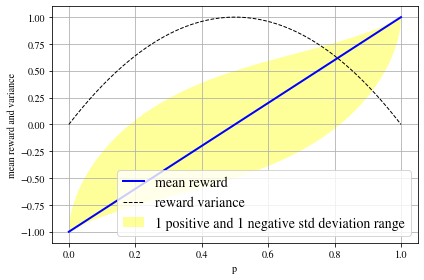

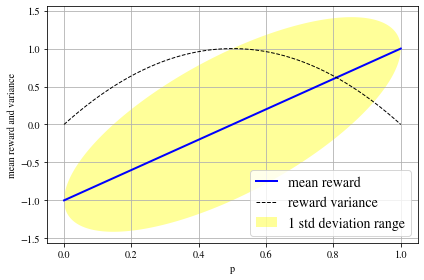

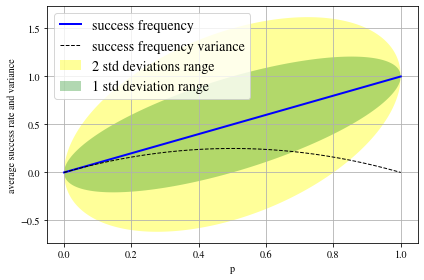

In [ ]:
#download_pics = True

x_size = 500
x = np.linspace(0, 1, x_size)
p = x
mean_r = 2 * p - 1 #np.linspace(-1, 1, x_size)
var_p  = p * (1-p)
var_mean  = 4 * var_p

# the +/- 1 sigma upper and lower analytic bounds
lower_dev_r_1_neg = mean_r - np.sqrt(var_mean) * p
upper_dev_r_1_pos = mean_r + np.sqrt(var_mean) * (1-p)
lower_dev_r_2_neg = mean_r - 2 * np.sqrt(var_mean) * p
upper_dev_r_2_pos = mean_r + 2 * np.sqrt(var_mean) * (1-p)

# the 1 sigma upper and lower analytic bounds
lower_dev_r_1 = mean_r - np.sqrt(var_mean)
upper_dev_r_1 = mean_r + np.sqrt(var_mean)
lower_dev_r_2 = mean_r - 2 * np.sqrt(var_mean)
upper_dev_r_2 = mean_r + 2 * np.sqrt(var_mean)

lower_dev_p_1 = p - np.sqrt(var_p)
upper_dev_p_1 = p + np.sqrt(var_p)
lower_dev_p_2 = p - 2 * np.sqrt(var_p)
upper_dev_p_2 = p + 2 * np.sqrt(var_p)

fig, ax = plt.subplots(1)
ax.plot(x, mean_r, lw=2, label='mean reward', color='blue')
ax.plot(x, var_mean, lw=1, label='reward variance', color='black', ls='--')
ax.fill_between(x, lower_dev_r_1_neg, upper_dev_r_1_pos, facecolor='yellow', alpha=0.4,
                label='1 positive and 1 negative std deviation range')
ax.legend()
ax.set_xlabel('p')
ax.set_ylabel('mean reward and variance')
ax.grid()

fig.tight_layout()

if save_pics:
  plt.savefig('bern_dist_pn_var.pdf', bbox_inches='tight')

plt.show()


fig, ax = plt.subplots(1)
ax.plot(x, mean_r, lw=2, label='mean reward', color='blue')
ax.plot(x, var_mean, lw=1, label='reward variance', color='black', ls='--')
ax.fill_between(x, lower_dev_r_1, upper_dev_r_1, facecolor='yellow', alpha=0.4,
                label='1 std deviation range')
ax.legend()
ax.set_xlabel('p')
ax.set_ylabel('mean reward and variance')
ax.grid()

fig.tight_layout()

if save_pics:
  plt.savefig('bern_dist_1.pdf', bbox_inches='tight')

plt.show()


fig, ax = plt.subplots(1)
ax.plot(x, p, lw=2, label='success frequency', color='blue')
ax.plot(x, var_p, lw=1, label='success frequency variance', color='black', ls='--')
ax.fill_between(x, lower_dev_p_2, upper_dev_p_2, facecolor='yellow', alpha=0.4,
                label='2 std deviations range')
ax.fill_between(x, lower_dev_p_1, upper_dev_p_1, facecolor='green', alpha=0.3,
                label='1 std deviation range')
ax.legend()
ax.set_xlabel('p')
ax.set_ylabel('average success rate and variance')
ax.grid()

fig.tight_layout()

if save_pics:
  plt.savefig('bern_dist_2.pdf', bbox_inches='tight')

plt.show()

In [ ]:
download_pics = False

if download_pics:
  files.download('w_probs.pdf')
  files.download('win_probs.pdf')
  files.download('beta_win_examples.pdf')
  #files.download('beta_win_examples_b.pdf')
  files.download('basic_strategies.pdf')
  files.download('basic_strategies_utilities.pdf')
  files.download('approx.pdf')
  files.download('combinations.pdf')
  files.download('naive_policy.pdf')
  files.download('naive_estimation_b_tau.pdf')
  files.download('bern_dist_pn_var.pdf')
  files.download('bern_dist_1.pdf')
  files.download('bern_dist_2.pdf')

